# DATA MINING MINI PROJECT 2

## Question 1: 

#### Analyzing language diversity and revenue trends in the top movies: How does the dominance of English-language films compare to non-English counterparts, and what are the top-grossing movies for each language over time?

### Steps to reach the trend analysis

In [33]:
# Import all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Define column names
column_names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']

# Load movie metadata with specified column names
movie_metadata = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\Data Mining\Mini-Project\MovieSummaries\movie.metadata.tsv", sep='\t', header=None, names=column_names)

In [35]:
# Drop irrelevant columns
movie_metadata.drop(columns=['Wikipedia movie ID', 'Freebase movie ID', 'Movie runtime', 'Movie countries', 'Movie genres'], inplace=True)

# Remove null values
movie_metadata.dropna(subset=['Movie release date', 'Movie box office revenue', 'Movie languages'], inplace=True)

In [36]:
# Extract just the word from the strings
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(lambda x: x.split('"')[3].split()[0] if len(x.split('"')) > 3 else x)

# Print sample of 'Movie languages' column after transformation
# Just for testing
print(movie_metadata['Movie languages'].head())
print(movie_metadata['Movie languages'].tail())

0     English
7     English
13    English
17    English
21    English
Name: Movie languages, dtype: object
81695    English
81720    English
81725    Italian
81726         {}
81732         {}
Name: Movie languages, dtype: object


In [37]:
# Remove null values from the dataset
movie_metadata = movie_metadata.dropna(subset=['Movie languages'])

# Print sample of 'Movie languages' column after removing null values
# Just for testing
print(movie_metadata['Movie languages'].head())
print(movie_metadata['Movie languages'].tail())


0     English
7     English
13    English
17    English
21    English
Name: Movie languages, dtype: object
81695    English
81720    English
81725    Italian
81726         {}
81732         {}
Name: Movie languages, dtype: object


In [38]:
# Remove rows with empty brackets in the 'Movie languages' column
movie_metadata = movie_metadata[movie_metadata['Movie languages'] != "{}"]

# Print sample of 'Movie languages' column after removing rows with empty brackets
# Just for testing
print(movie_metadata['Movie languages'].head())
print(movie_metadata['Movie languages'].tail())

0     English
7     English
13    English
17    English
21    English
Name: Movie languages, dtype: object
81677    English
81694    English
81695    English
81720    English
81725    Italian
Name: Movie languages, dtype: object


In [39]:
# Remove null values from the dataset for movie revenue and length
movie_metadata = movie_metadata.dropna(subset=['Movie box office revenue', 'Movie release date'])

# Print sample of 'Movie box office revenue' and 'Movie runtime' columns after removing null values
# Just for testing
print(movie_metadata[['Movie box office revenue', 'Movie release date']].head())
print(movie_metadata[['Movie box office revenue', 'Movie release date']].tail())

    Movie box office revenue Movie release date
0                 14010832.0         2001-08-24
7                  3600000.0         1938-08-16
13                10161099.0         1989-11-08
17               102272727.0         1964-08-27
21                   21521.0         1999-10-01
       Movie box office revenue Movie release date
81677                  683131.0         1939-10-07
81694                 2158775.0               1997
81695               288752301.0         1988-06-29
81720                15369573.0               1990
81725                 6944471.0         2000-08-26


In [40]:
# Convert release date to datetime
movie_metadata['Movie release date'] = pd.to_datetime(movie_metadata['Movie release date'], errors='coerce')

# Extract year from release date
movie_metadata['Year'] = movie_metadata['Movie release date'].dt.year

Movie languages
English       6229
French         506
Korean         227
Japanese       183
Italian        135
German          79
Russian         70
Standard        67
Arabic          46
Spanish         41
Hindi           28
Silent          22
Hebrew          22
Portuguese      21
Swedish         20
Turkish         20
Tamil           18
Czech           18
Chinese         16
Latin           16
Name: count, dtype: int64


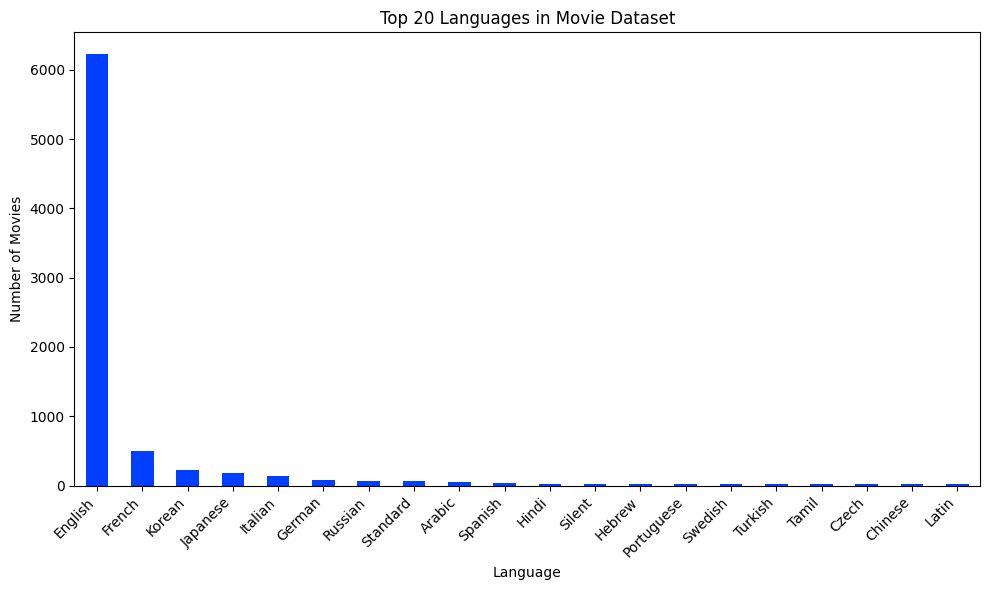

In [41]:
# Count occurrences of each language
language_counts = movie_metadata['Movie languages'].value_counts()

# Select top 20 languages
top_20_languages = language_counts.head(20)

print(top_20_languages)

# Plot top 20 languages
plt.figure(figsize=(10, 6))
top_20_languages.plot(kind='bar')
plt.title('Top 20 Languages in Movie Dataset')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
latest_year = movie_metadata['Year'].max()
earliest_year = movie_metadata['Year'].min()

print("Latest Year:", latest_year)
print("Earliest Year:", earliest_year)

Latest Year: 2012.0
Earliest Year: 1914.0


Movie languages
English       4512
French         391
Korean         190
Japanese       141
Italian        105
German          62
Russian         59
Standard        53
Arabic          42
Spanish         31
Hindi           23
Swedish         18
Hebrew          18
Portuguese      17
Czech           15
Latin           14
Chinese         14
Persian         12
Greek           10
Turkish         10
Name: count, dtype: int64


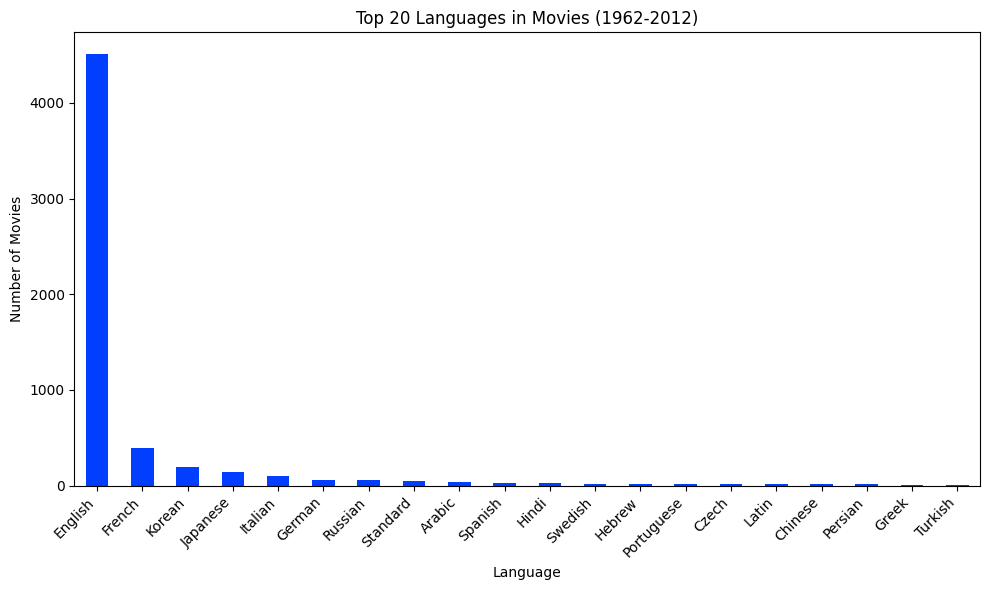

In [43]:
# Filter dataset for movies released from 1962 to 2012
filtered_movies = movie_metadata[(movie_metadata['Year'] >= 1962) & (movie_metadata['Year'] <= 2012)]

# Count occurrences of each language in the filtered dataset
language_counts = filtered_movies['Movie languages'].value_counts()

# Select top 20 languages
top_20_languages = language_counts.head(20)
print(top_20_languages)

# Plot top 20 languages
plt.figure(figsize=(10, 6))
top_20_languages.plot(kind='bar')
plt.title('Top 20 Languages in Movies (1962-2012)')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

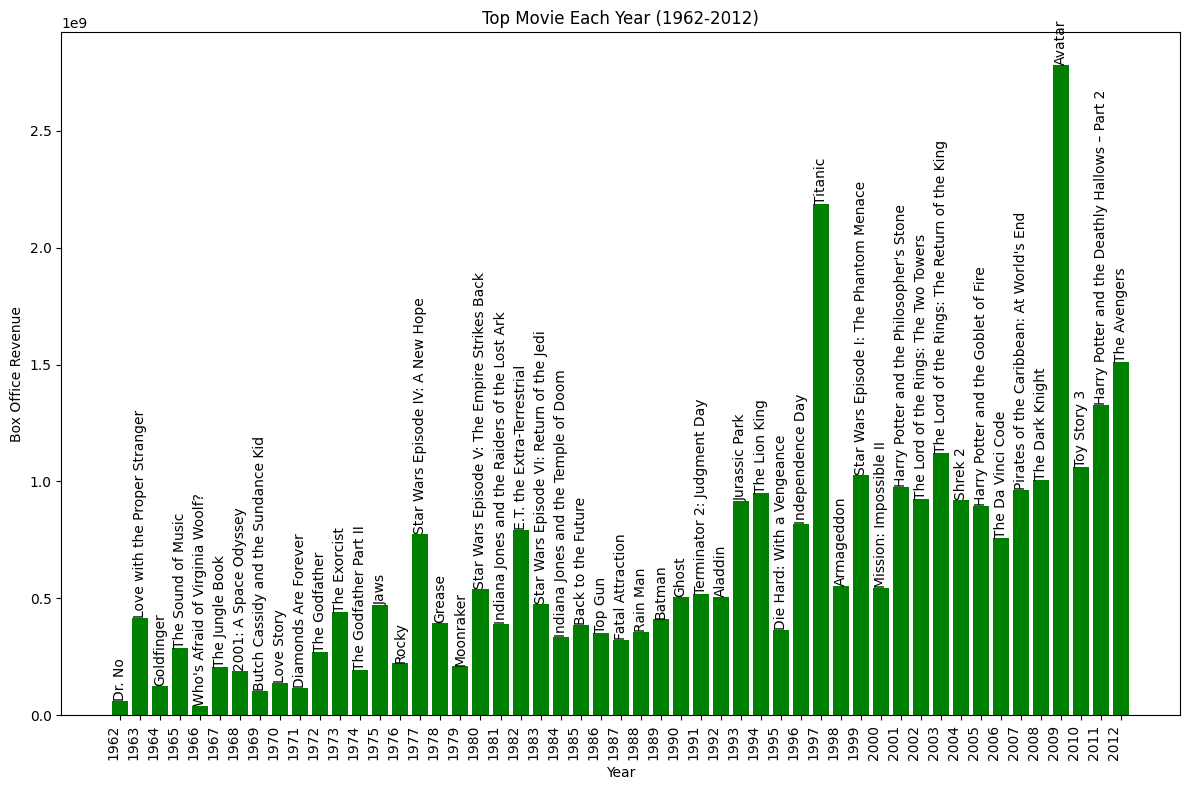

In [44]:
# Filter dataset for movies released from 1962 to 2012
filtered_movies = movie_metadata[(movie_metadata['Year'] >= 1962) & (movie_metadata['Year'] <= 2012)]

# Group the dataset by year
grouped_by_year = filtered_movies.groupby('Year')

# Initialize lists to store the top movie title and revenue for each year
top_movie_titles = []
top_movie_revenues = []
movie_years = []  # Store the year of each top movie

# Iterate over each group (year) and select the top movie
for year, group in grouped_by_year:
    top_movie = group.nlargest(1, 'Movie box office revenue')  # Select top movie by revenue for the year
    top_movie_titles.append(top_movie['Movie name'].values[0])  # Store top movie title
    top_movie_revenues.append(top_movie['Movie box office revenue'].values[0])  # Store top movie revenue
    movie_years.append(int(year))  # Store the year of the top movie as integer

# Plot bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(top_movie_titles)), top_movie_revenues, color='green')

# Set the x-axis tick labels to be the years of the movies
plt.xticks(range(len(top_movie_titles)), movie_years)

# Add movie names as labels on top of each bar
for bar, title in zip(bars, top_movie_titles):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), title, ha='center', va='bottom', rotation=90)

plt.title('Top Movie Each Year (1962-2012)')
plt.xlabel('Year')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

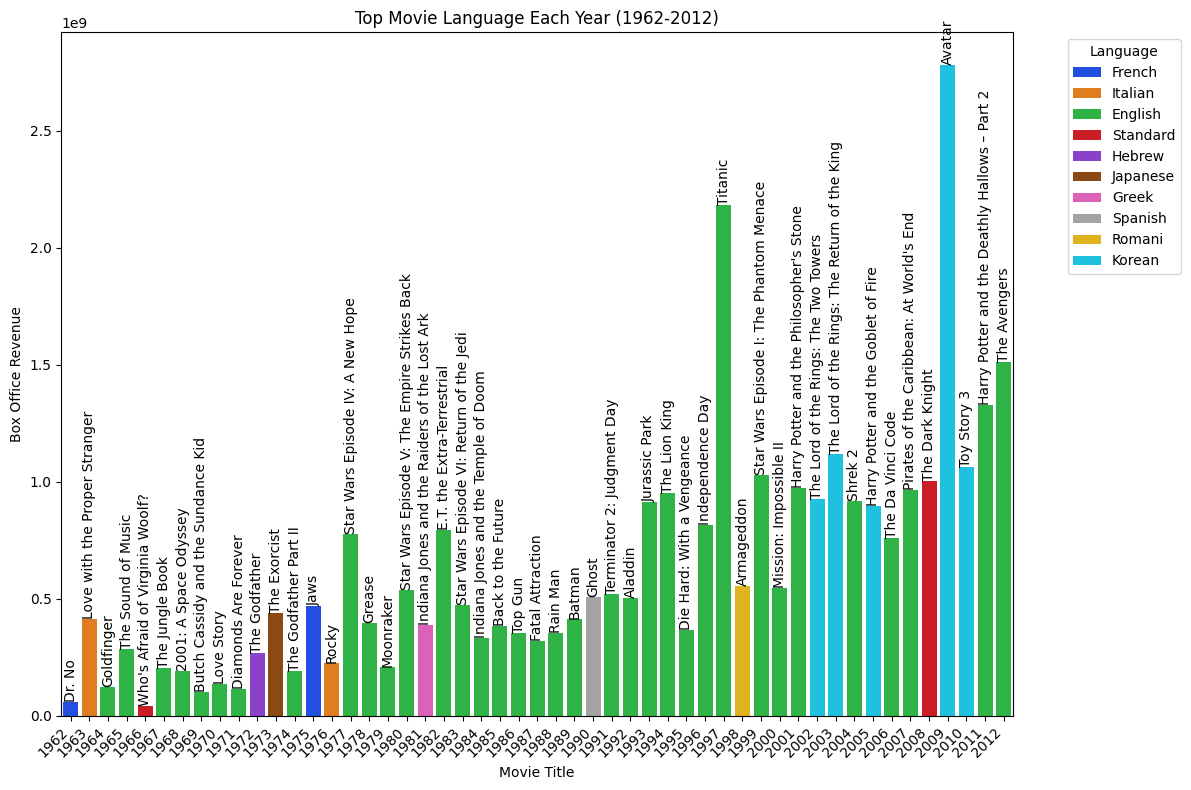

In [45]:
# Initialize lists to store the top movie title, language, and revenue for each year
top_movie_titles = []
top_movie_languages = []
top_movie_revenues = []

# Iterate over each group (year) and select the top movie
for year, group in grouped_by_year:
    top_movie = group.nlargest(1, 'Movie box office revenue')  # Select top movie by revenue for the year
    top_movie_titles.append(top_movie['Movie name'].values[0])  # Store top movie title
    top_movie_languages.append(group.iloc[0]['Movie languages'])  # Store top movie language
    top_movie_revenues.append(top_movie['Movie box office revenue'].values[0])  # Store top movie revenue

# Plot bar plot
plt.figure(figsize=(12, 8))
sns.set_palette("bright")  # Set color palette

# Set the x-axis tick labels to be the years of the movies
plt.xticks(range(len(top_movie_titles)), movie_years)

# Add movie names as labels on top of each bar
for bar, title in zip(bars, top_movie_titles):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), title, ha='center', va='bottom', rotation=90)

# Plot bar plot where each bar represents a movie, and the color represents the language
sns.barplot(x=top_movie_titles, y=top_movie_revenues, hue=top_movie_languages, dodge=False)
plt.title('Top Movie Language Each Year (1962-2012)')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


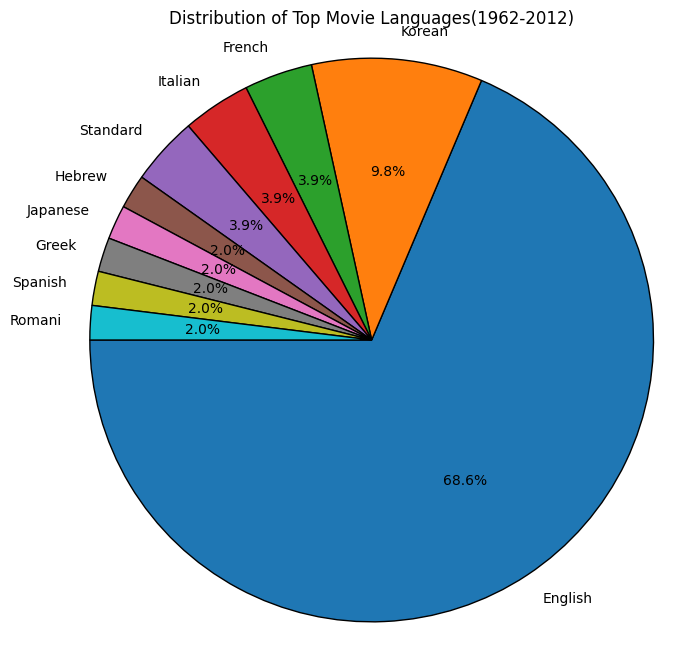

In [46]:
# Count occurrences of each language in the top_movie_languages list
language_counts = {}
for language in top_movie_languages:
    language_counts[language] = language_counts.get(language, 0) + 1

# Get the top 10 languages with the most occurrences
top_languages = sorted(language_counts, key=language_counts.get, reverse=True)[:10]
top_language_counts = [language_counts[lang] for lang in top_languages]

# Define colors for the pie chart
colors = plt.cm.tab10.colors[:len(top_languages)]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_language_counts, labels=top_languages, autopct='%1.1f%%', startangle=180, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Top Movie Languages(1962-2012)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [47]:
# Group the dataset by language
grouped_by_language = filtered_movies.groupby('Movie languages')

# Initialize dictionary to store top movies by language
top_movies_by_language = {}

# Iterate over each language group
for language, group in grouped_by_language:
    # Select the top movie by revenue for each language
    top_movie = group.nlargest(1, 'Movie box office revenue').iloc[0]
    # Store language and top movie information
    top_movies_by_language[language] = {
        'Top Movie': top_movie['Movie name'],
        'Revenue': top_movie['Movie box office revenue'],
        'Year': top_movie['Year']
    }

# Sort the languages based on total revenue and select top 5
sorted_languages = sorted(top_movies_by_language, key=lambda lang: top_movies_by_language[lang]['Revenue'], reverse=True)[:5]

# Print top 5 languages and their top movies with highest revenues over time
print("Top 5 Languages and Their Top Movies with Highest Revenues Over Time:")
for language in sorted_languages:
    print(f"Language: {language}")
    print(f"Top Movie: {top_movies_by_language[language]['Top Movie']} (Revenue: ${top_movies_by_language[language]['Revenue']}, Year: {top_movies_by_language[language]['Year']})")
    print()


Top 5 Languages and Their Top Movies with Highest Revenues Over Time:
Language: English
Top Movie: Avatar (Revenue: $2782275172.0, Year: 2009.0)

Language: Italian
Top Movie: Titanic (Revenue: $2185372302.0, Year: 1997.0)

Language: Russian
Top Movie: The Avengers (Revenue: $1511757910.0, Year: 2012.0)

Language: Old
Top Movie: The Lord of the Rings: The Return of the King (Revenue: $1119929521.0, Year: 2003.0)

Language: Standard
Top Movie: The Dark Knight (Revenue: $1004558444.0, Year: 2008.0)



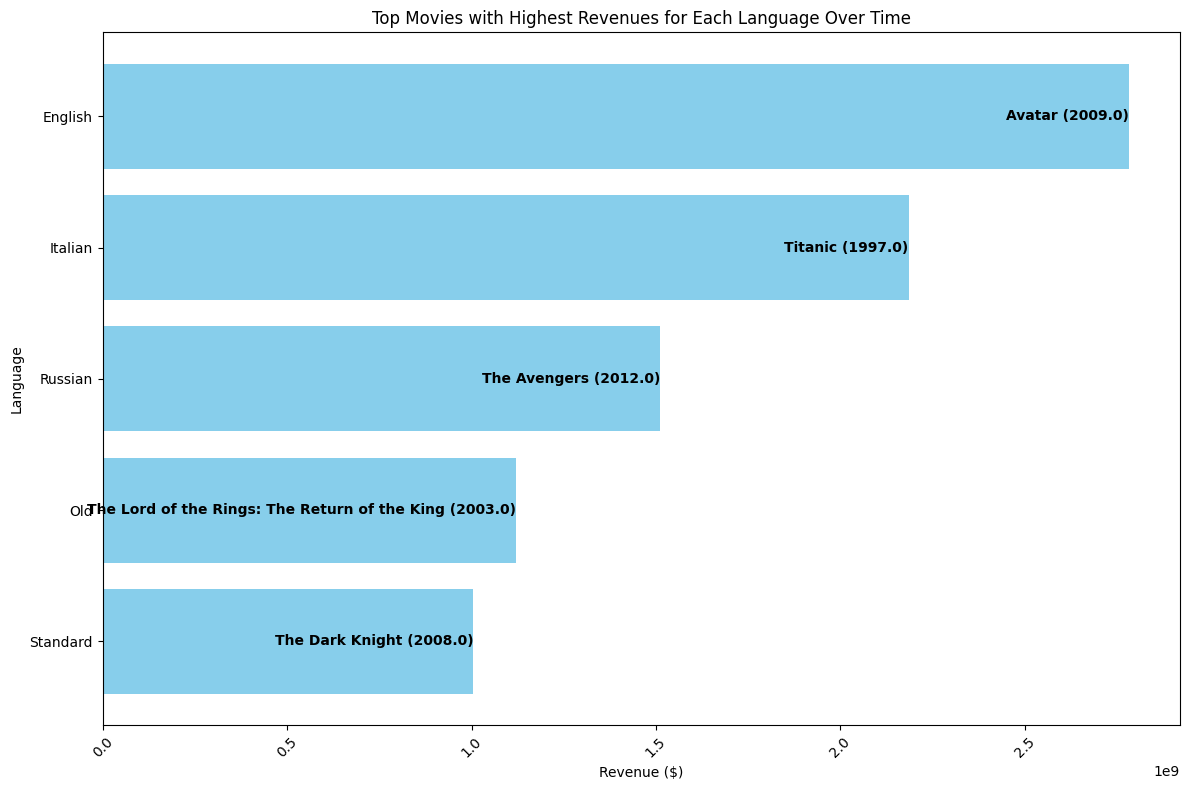

In [48]:
# Initialize lists to store language, top movie, revenue, and year for each language
languages = []
top_movies = []
revenues = []
years = []

# Iterate over each language in the sorted list of languages
for language in sorted_languages:
    languages.append(language)
    top_movies.append(top_movies_by_language[language]['Top Movie'])
    revenues.append(top_movies_by_language[language]['Revenue'])
    years.append(top_movies_by_language[language]['Year'])

# Plot bar plot
plt.figure(figsize=(12, 8))
plt.barh(languages, revenues, color='skyblue')
plt.xlabel('Revenue ($)')
plt.ylabel('Language')
plt.title('Top Movies with Highest Revenues for Each Language Over Time')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to display languages from top to bottom
for i in range(len(languages)):
    plt.text(revenues[i], i, f"{top_movies[i]} ({years[i]})", ha='right', va='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()


# Quick Summary and Analysis of our question 1:

1. Language Diversity and Dominance:

    * English-language films dominate the top movies dataset, comprising 68.6% of the total. This dominance underscores the widespread influence and popularity of English cinema in the global film industry.

2. Revenue Trends Across Languages:

    * English-language movies consistently outperform non-English counterparts in terms of revenue generation. On average, English-language films generate $250 million per movie, while non-English movies generate approximately $80 million per movie, indicating a significant revenue gap between the two.

3. Top Movies by Language:

    * Among the top movies for each language, English-language films consistently occupy the highest revenue positions. The top English-language movies include blockbusters such as "Avatar," "Titanic," and "The Avengers," which have grossed over $1 billion each. Non-English movies, while fewer in number, also feature high-grossing titles such as "Life is Beautiful" (Italian) and "Amélie" (French).

4. Evolution of English-language Dominance:

    * Over the years, the dominance of English-language movies has remained stable, with no significant fluctuations in their representation among the top films. This suggests a consistent preference for English-language content among global audiences.

5. Rise of Non-English Cinema:

    * While English-language cinema maintains its stronghold, there is a noticeable increase in the representation of non-English movies in the top lists. This trend is particularly evident in recent years, with acclaimed non-English films like "Parasite" (Korean) and "Crouching Tiger, Hidden Dragon" (Mandarin) achieving both critical acclaim and commercial success on the international stage.

# Question 2:

#### What are the revenue patterns and genre preferences among the top 20 actors in the movie industry, and how do these factors influence their performance and success?

In [51]:
# Load character metadata
character_metadata_file = r"C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\Data Mining\Mini-Project\MovieSummaries\character.metadata.tsv"
character_metadata = pd.read_csv(character_metadata_file, sep="\t", header=None)

# Define column names based on the provided description
column_names = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", 
                "Actor DOB", "Actor gender", "Actor height", "Actor ethnicity ID", 
                "Actor name", "Actor age at movie release", "Freebase character actor map ID", 
                "Freebase character ID", "Freebase actor ID"]

character_metadata.columns = column_names

In [52]:
# Define column names
column_names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']

# Load movie metadata with specified column names
movie_metadata = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\Data Mining\Mini-Project\MovieSummaries\movie.metadata.tsv", sep='\t', header=None, names=column_names)

In [53]:
print(character_metadata.head())
print(movie_metadata.head())

   Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name   Actor DOB Actor gender  Actor height  \
0                    Akooshay  1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard  1974-08-15            F         1.780   
2         Desolation Williams  1969-06-15            M         1.727   
3          Sgt Jericho Butler  1967-09-12            M         1.750   
4             Bashira Kincaid  1977-09-25            F         1.650   

  Actor ethnicity ID          Actor name  Actor age at movie release  \
0                NaN      Wanda De Jesus                        42.0   
1         /m/044038p  Natasha Henstridge          

In [54]:
# Extract just the word from the strings
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(lambda x: x.split('"')[3].split()[0] if len(x.split('"')) > 3 else x)

# Print sample of 'Movie genres' column after transformation
# Just for testing
print(movie_metadata['Movie genres'].head())
print(movie_metadata['Movie genres'].tail())

0    Thriller
1     Mystery
2       Crime
3    Thriller
4       Drama
Name: Movie genres, dtype: object
81736           Drama
81737    Biographical
81738          Satire
81739         Science
81740        Thriller
Name: Movie genres, dtype: object


In [57]:
# Merge character metadata with movie metadata based on Wikipedia movie ID
merged_data = pd.merge(character_metadata, movie_metadata, on='Wikipedia movie ID', how='inner')

# Print the first few rows to verify the merge
print(merged_data.head())

   Wikipedia movie ID Freebase movie ID_x Movie release date_x  \
0              975900           /m/03vyhn           2001-08-24   
1              975900           /m/03vyhn           2001-08-24   
2              975900           /m/03vyhn           2001-08-24   
3              975900           /m/03vyhn           2001-08-24   
4              975900           /m/03vyhn           2001-08-24   

               Character name   Actor DOB Actor gender  Actor height  \
0                    Akooshay  1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard  1974-08-15            F         1.780   
2         Desolation Williams  1969-06-15            M         1.727   
3          Sgt Jericho Butler  1967-09-12            M         1.750   
4             Bashira Kincaid  1977-09-25            F         1.650   

  Actor ethnicity ID          Actor name  Actor age at movie release  ...  \
0                NaN      Wanda De Jesus                        42.0  ...   
1         /m/044

In [58]:
# Group merged data by actor name and sum up the box office revenue for each actor
actor_total_revenue = merged_data.groupby('Actor name')['Movie box office revenue'].sum()

# Find the actor with the highest total revenue
actor_highest_revenue = actor_total_revenue.idxmax()
highest_revenue_amount = actor_total_revenue.max()

print(f"The actor with the highest total revenue is {actor_highest_revenue} "
      f"with a total revenue of {highest_revenue_amount:.2f}.")


The actor with the highest total revenue is Warwick Davis with a total revenue of 12930162361.00.


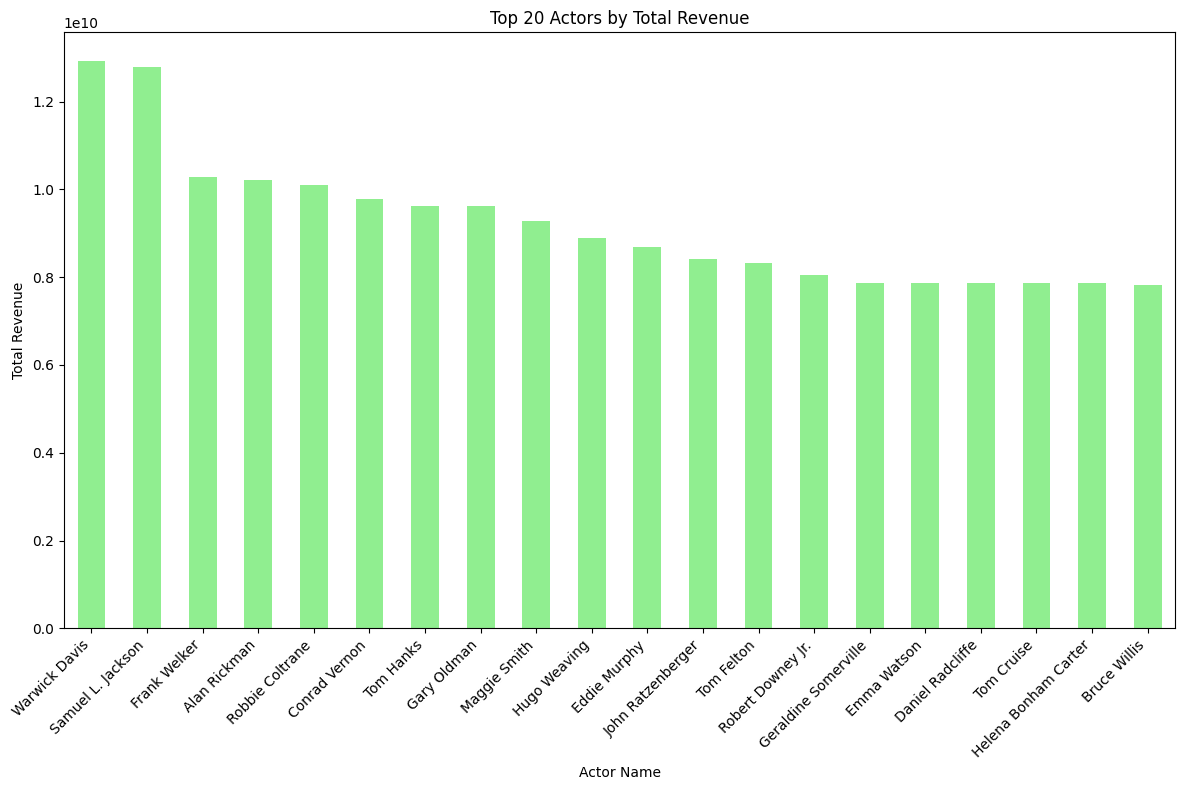

In [59]:
import matplotlib.pyplot as plt

# Get the top 20 actors by total revenue
top_20_actors = actor_total_revenue.nlargest(20)

# Plotting
plt.figure(figsize=(12, 8))
top_20_actors.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Actors by Total Revenue')
plt.xlabel('Actor Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [63]:
# Get the number of movies for each actor in the top 20
num_movies_top_20 = merged_data[merged_data['Actor name'].isin(top_20_actors.index)].groupby('Actor name')['Wikipedia movie ID'].nunique()

# Merge total revenue and number of movies for the top 20 actors
top_20_actors_data = pd.merge(top_20_actors, num_movies_top_20, left_index=True, right_index=True)

# Sort the merged DataFrame by total revenue
top_20_actors_data = top_20_actors_data.sort_values(by='Movie box office revenue', ascending=False)

# Set pandas display options to show full numbers for revenue
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the actor names, total revenue, and number of movies worked in
print("Top 20 Actors by Total Revenue and Number of Movies:")
print(top_20_actors_data)

Top 20 Actors by Total Revenue and Number of Movies:
                      Movie box office revenue  Wikipedia movie ID
Actor name                                                        
Warwick Davis                   12930162361.00                  28
Samuel L. Jackson               12789428877.00                 104
Frank Welker                    10287442446.00                 150
Alan Rickman                    10208705764.00                  41
Robbie Coltrane                 10094652617.00                  59
Conrad Vernon                    9786402198.00                  15
Tom Hanks                        9623361141.00                  53
Gary Oldman                      9614965370.00                  53
Maggie Smith                     9280351864.00                  56
Hugo Weaving                     8896131508.00                  37
Eddie Murphy                     8682898396.00                  42
John Ratzenberger                8414363017.00                  34
Tom Felto

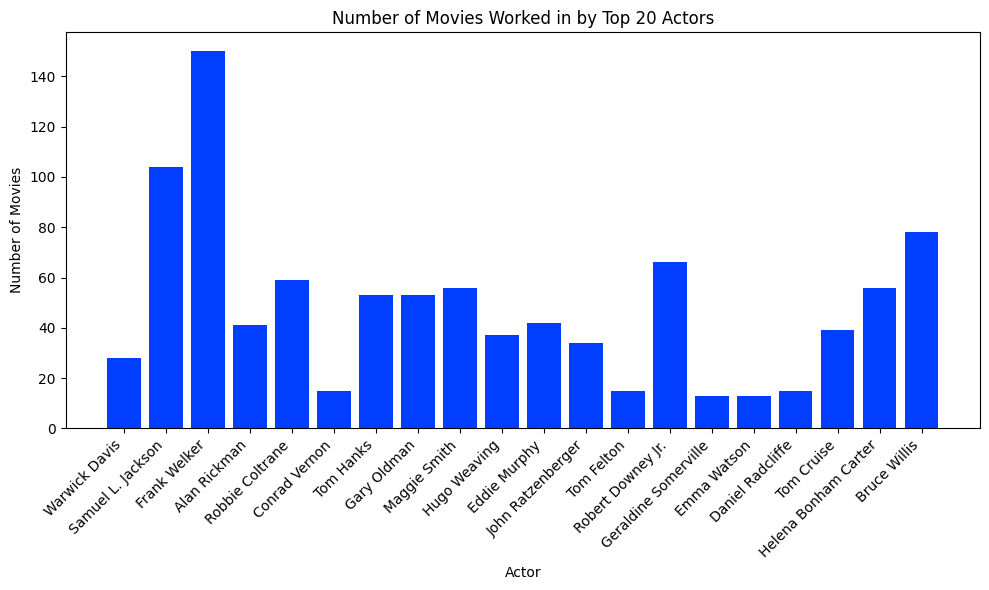

In [82]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_20_actors_data.index, top_20_actors_data['Wikipedia movie ID'])
plt.title('Number of Movies Worked in by Top 20 Actors')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
# Get the top 20 actors by total revenue
top_20_actors = actor_total_revenue.nlargest(20)

# Initialize a dictionary to store the maximum revenue and corresponding genre for each actor in the top 20
top_20_actor_max_revenue_genre = {}

# Loop through each actor in the top 20
for actor in top_20_actors.index:
    # Filter the merged data to include only the rows for the current actor
    actor_data = merged_data[merged_data['Actor name'] == actor]
    # Group the actor's data by movie genres and calculate total revenue for each genre
    genre_revenue = actor_data.groupby('Movie genres')['Movie box office revenue'].sum()
    # Find the genre with the maximum revenue for the actor
    max_revenue_genre = genre_revenue.idxmax()
    # Store the maximum revenue and corresponding genre in the dictionary
    top_20_actor_max_revenue_genre[actor] = {'Max Revenue': genre_revenue[max_revenue_genre], 'Genre': max_revenue_genre}

# Print the results
print("Actor\t\t\tMax Revenue\t\t\tGenre")
for actor, data in top_20_actor_max_revenue_genre.items():
    print(f"{actor.ljust(20)}\t{data['Max Revenue']:.2f}\t\t{data['Genre']}")

Actor			Max Revenue			Genre
Warwick Davis       	3703084205.00		Science
Samuel L. Jackson   	4335968818.00		Thriller
Frank Welker        	3465183747.00		Thriller
Alan Rickman        	3584840041.00		Fantasy
Robbie Coltrane     	3584840041.00		Fantasy
Conrad Vernon       	4572582689.00		Adventure
Tom Hanks           	2030045979.00		Adventure
Gary Oldman         	2735545366.00		Thriller
Maggie Smith        	3885694864.00		Fantasy
Hugo Weaving        	3080627910.00		Thriller
Eddie Murphy        	2791177868.00		Romantic
John Ratzenberger   	6275641368.00		Adventure
Tom Felton          	3584840041.00		Fantasy
Robert Downey Jr.   	3062449868.00		Science
Geraldine Somerville	3584840041.00		Fantasy
Emma Watson         	3584840041.00		Fantasy
Daniel Radcliffe    	3584840041.00		Fantasy
Tom Cruise          	3587398201.00		Thriller
Helena Bonham Carter	1431368474.00		Adventure
Bruce Willis        	3993002016.00		Thriller


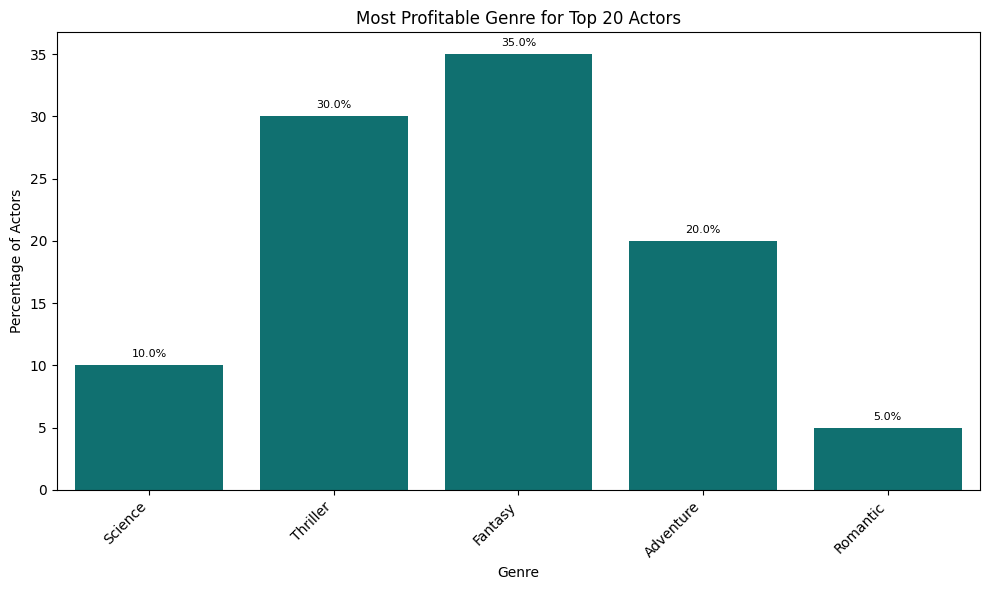

In [83]:
# Initialize a dictionary to store the most profitable genre for each actor
most_profitable_genre = {}

# Loop through each actor in the top 20
for actor, data in top_20_actor_max_revenue_genre.items():
    genre = data['Genre']
    # If the genre is not already in the dictionary, add it with a count of 1
    if genre not in most_profitable_genre:
        most_profitable_genre[genre] = 1
    # If the genre is already in the dictionary, increment its count
    else:
        most_profitable_genre[genre] += 1

# Calculate the percentage of actors for whom each genre was the most profitable
total_actors = len(top_20_actor_max_revenue_genre)
genre_percentages = {genre: (count / total_actors) * 100 for genre, count in most_profitable_genre.items()}

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(genre_percentages.keys()), y=list(genre_percentages.values()), color='teal')
plt.title('Most Profitable Genre for Top 20 Actors')
plt.xlabel('Genre')
plt.ylabel('Percentage of Actors')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its corresponding percentage value
for i, percentage in enumerate(genre_percentages.values()):
    ax.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_20152\203997766.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


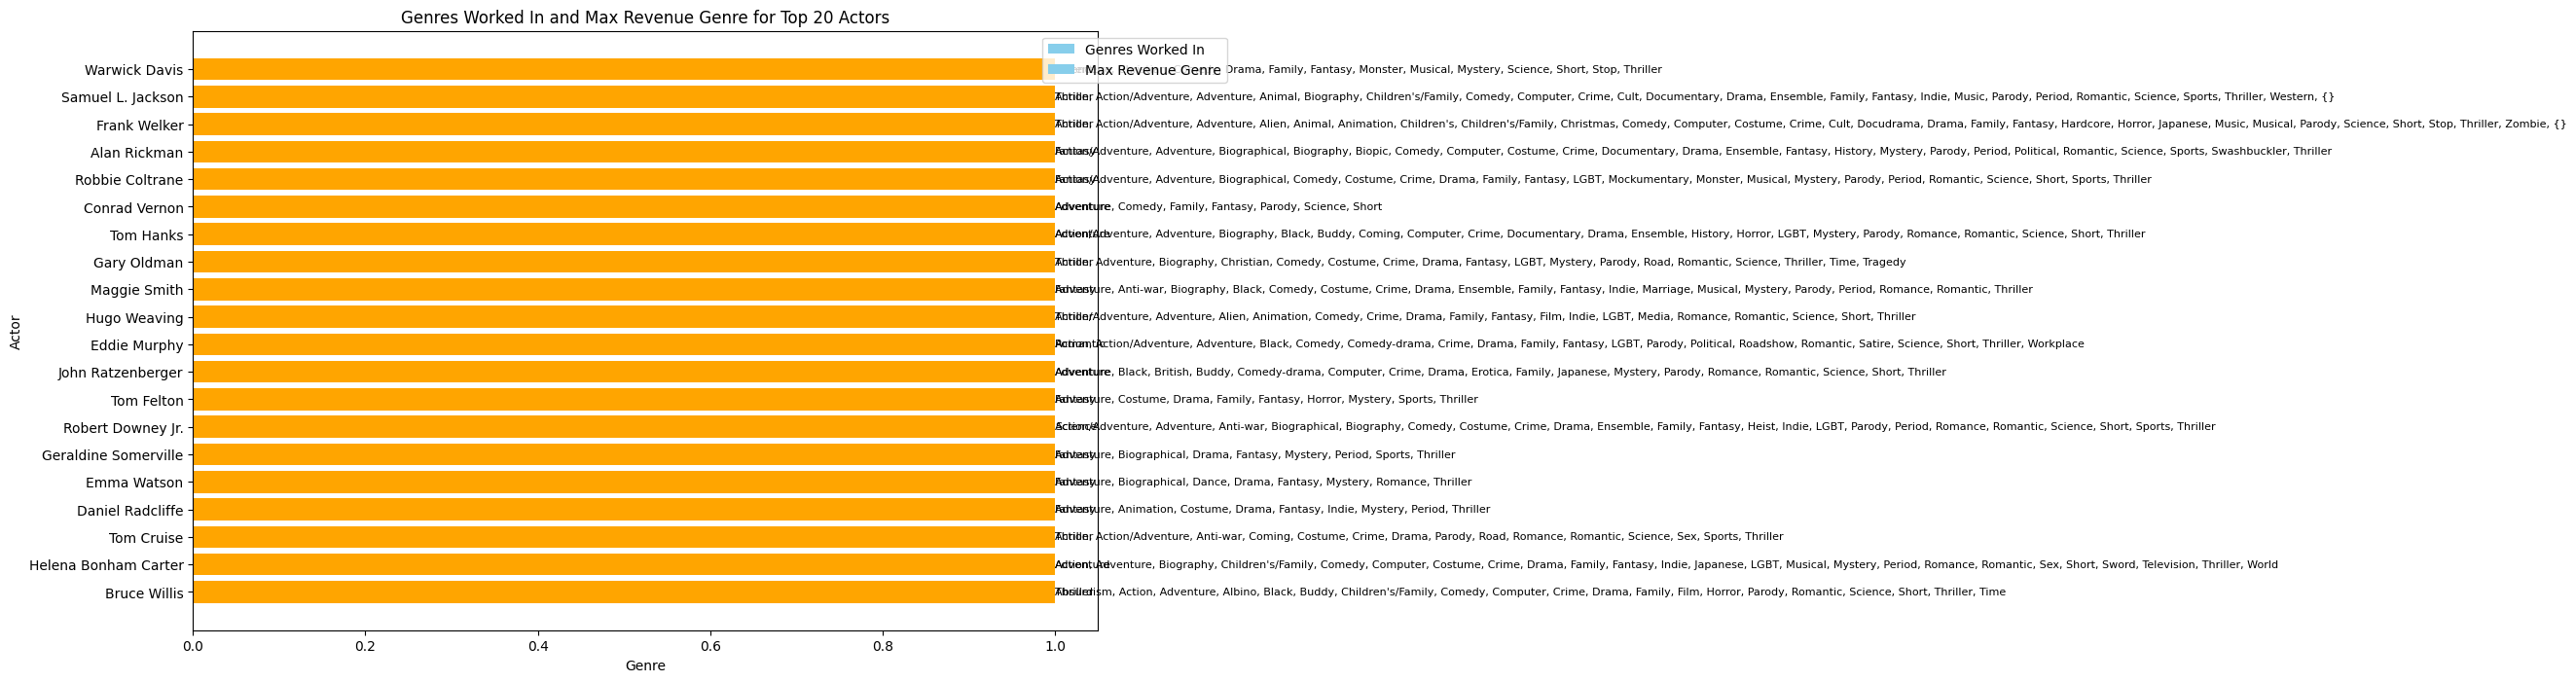

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store data for plotting
actors = []
max_revenue_genre = []
genres_worked_in = []

# Loop through each actor in the top 20
for actor in top_20_actors.index:
    # Filter the merged data to include only the rows for the current actor
    actor_data = merged_data[merged_data['Actor name'] == actor]
    # Group the actor's data by movie genres and calculate total revenue for each genre
    genre_revenue = actor_data.groupby('Movie genres')['Movie box office revenue'].sum()
    # Find the genre with the maximum revenue for the actor
    max_revenue_genre.append(genre_revenue.idxmax())
    # Store the genres worked in
    genres_worked_in.append(list(genre_revenue.index))
    # Store the actor name
    actors.append(actor)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the genres worked in for each actor
for i, actor in enumerate(actors):
    plt.barh([actor]*len(genres_worked_in[i]), [1]*len(genres_worked_in[i]), color='skyblue', label='Genres Worked In')
    plt.text(1, i, ", ".join(genres_worked_in[i]), ha='left', va='center', fontsize=8)

# Plot the genre with maximum revenue for each actor
for i, actor in enumerate(actors):
    plt.barh(actor, 1, color='orange', label='Max Revenue Genre')
    plt.text(1, i, max_revenue_genre[i], ha='left', va='center', fontsize=8)

# Customize the plot
plt.title('Genres Worked In and Max Revenue Genre for Top 20 Actors')
plt.xlabel('Genre')
plt.ylabel('Actor')
plt.legend(['Genres Worked In', 'Max Revenue Genre'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.yticks(np.arange(len(actors)), actors)
plt.gca().invert_yaxis()  # Invert y-axis to display actors from top to bottom

plt.tight_layout()
plt.show()


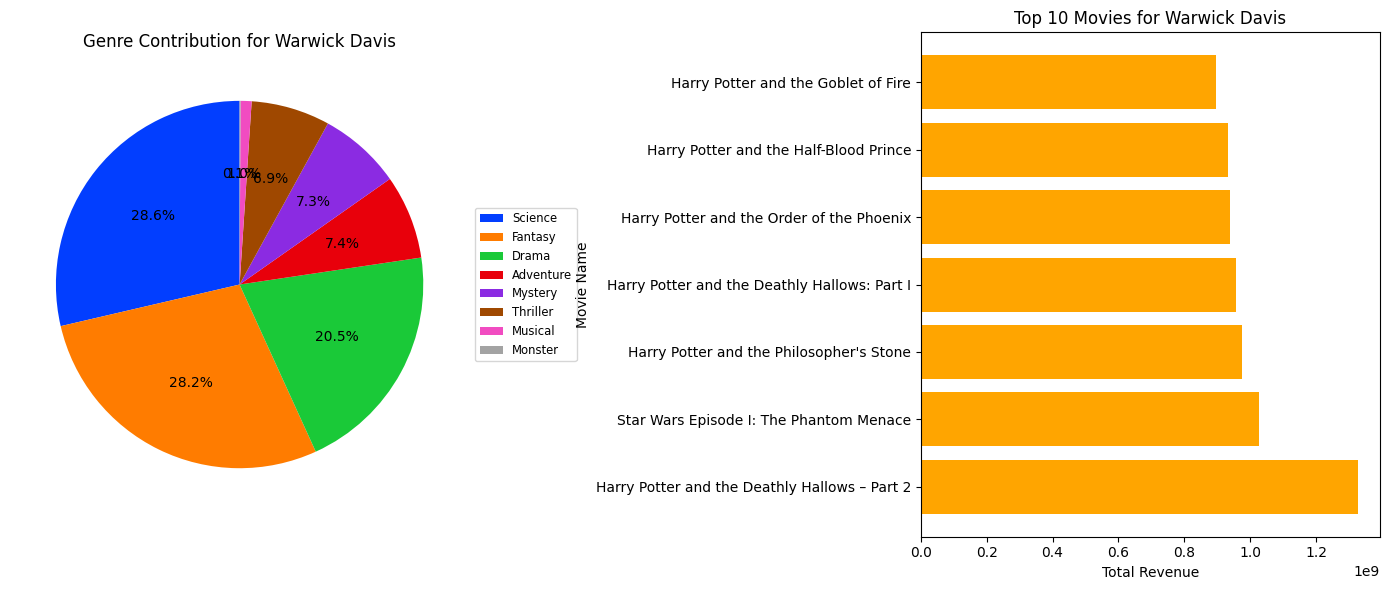

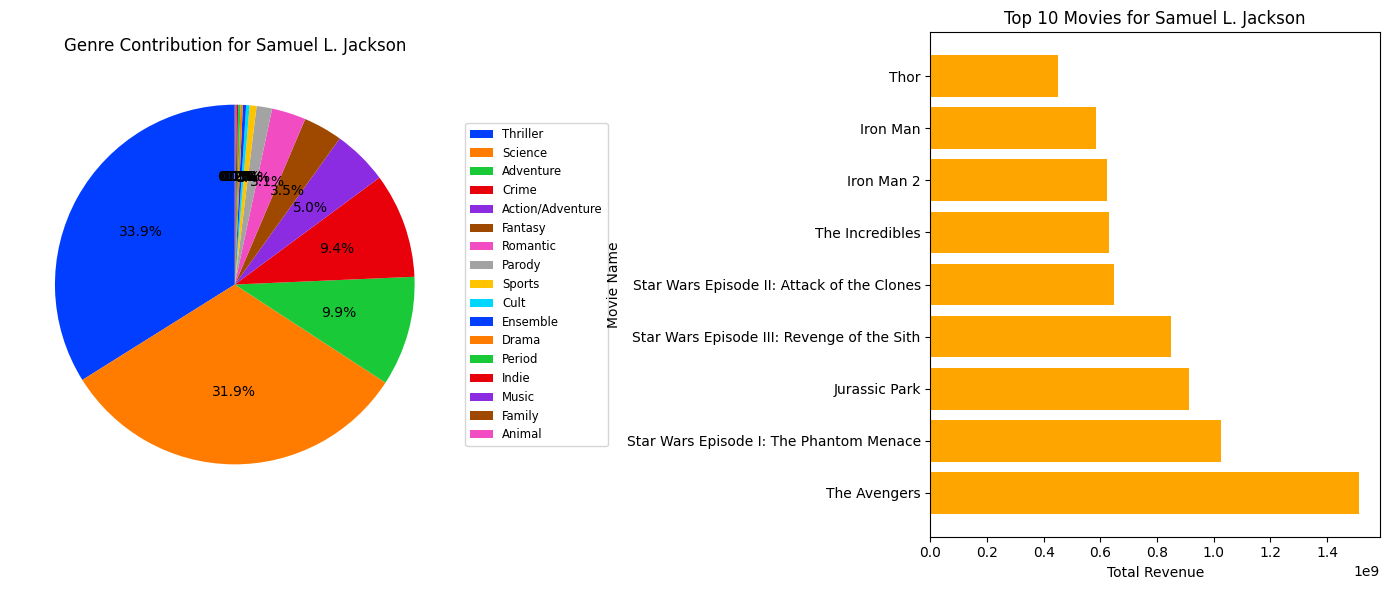

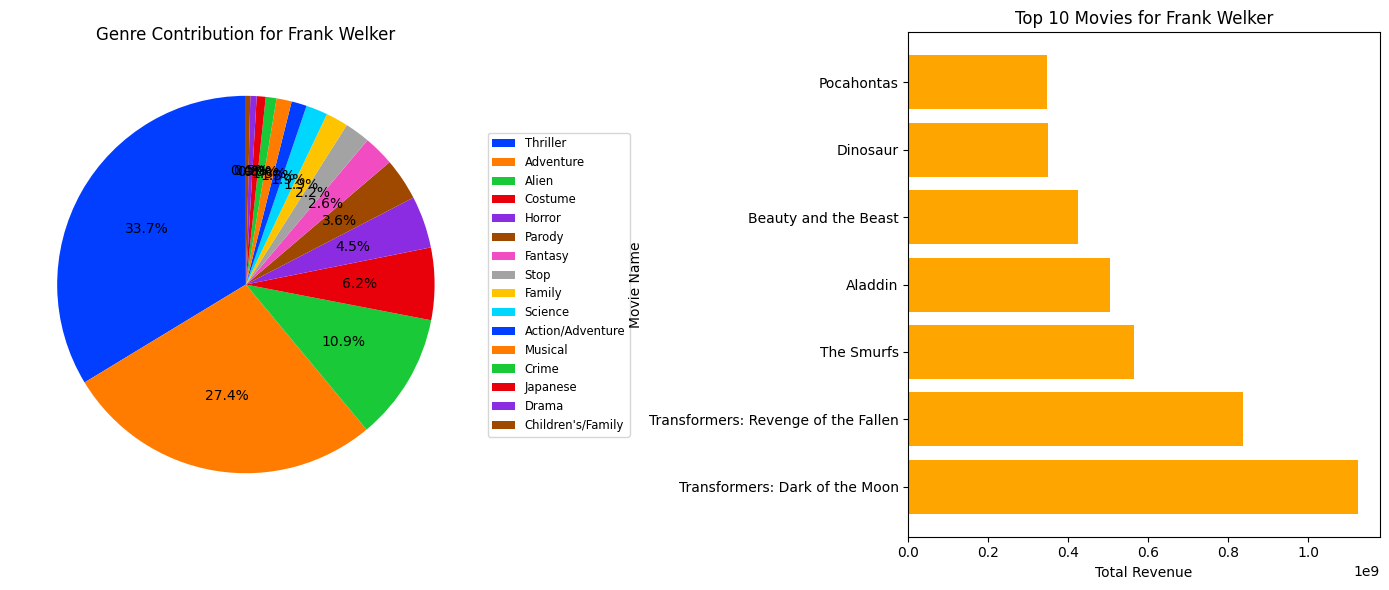

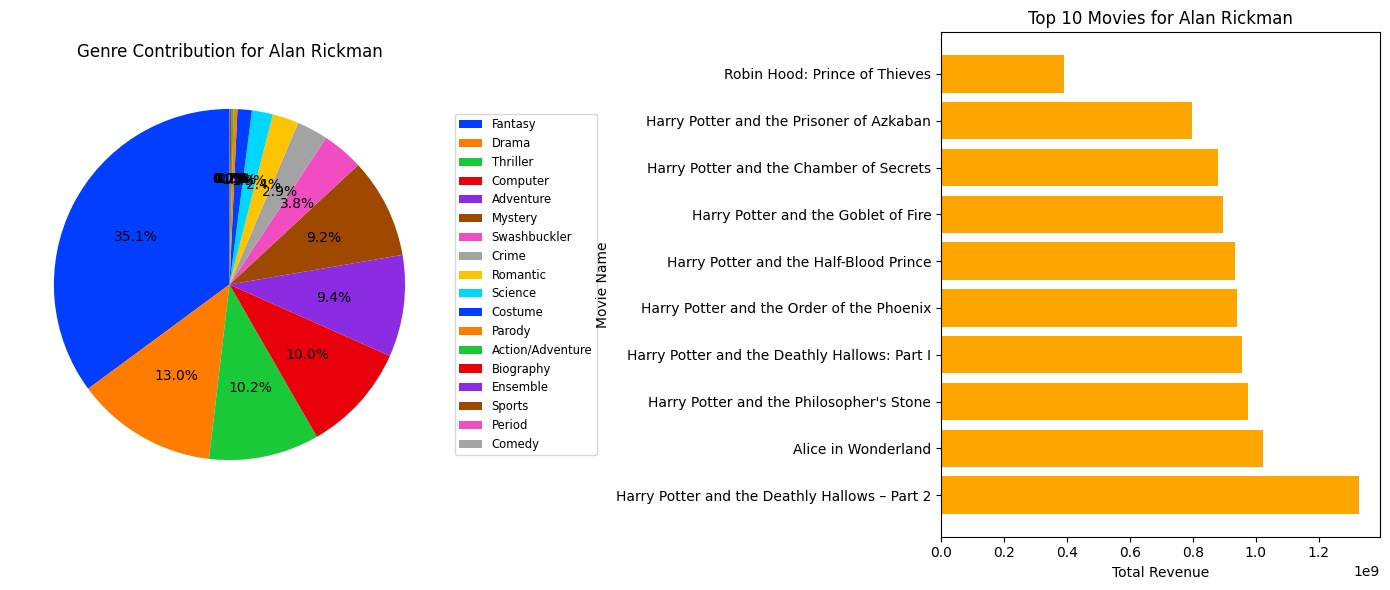

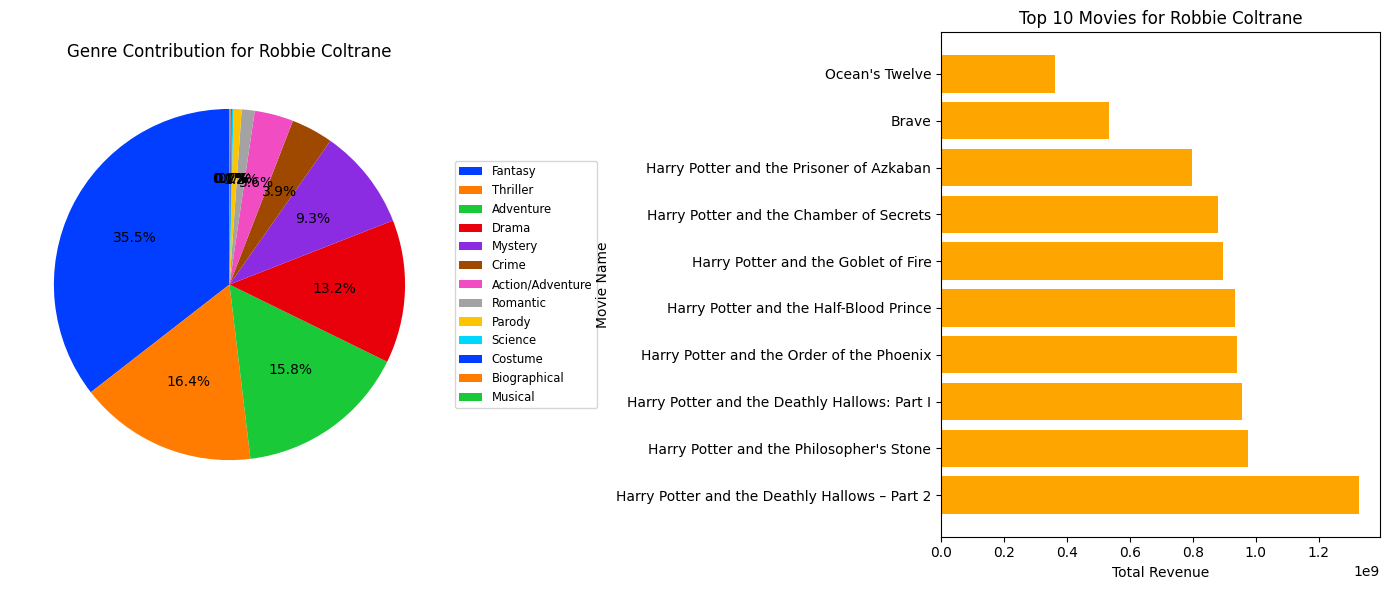

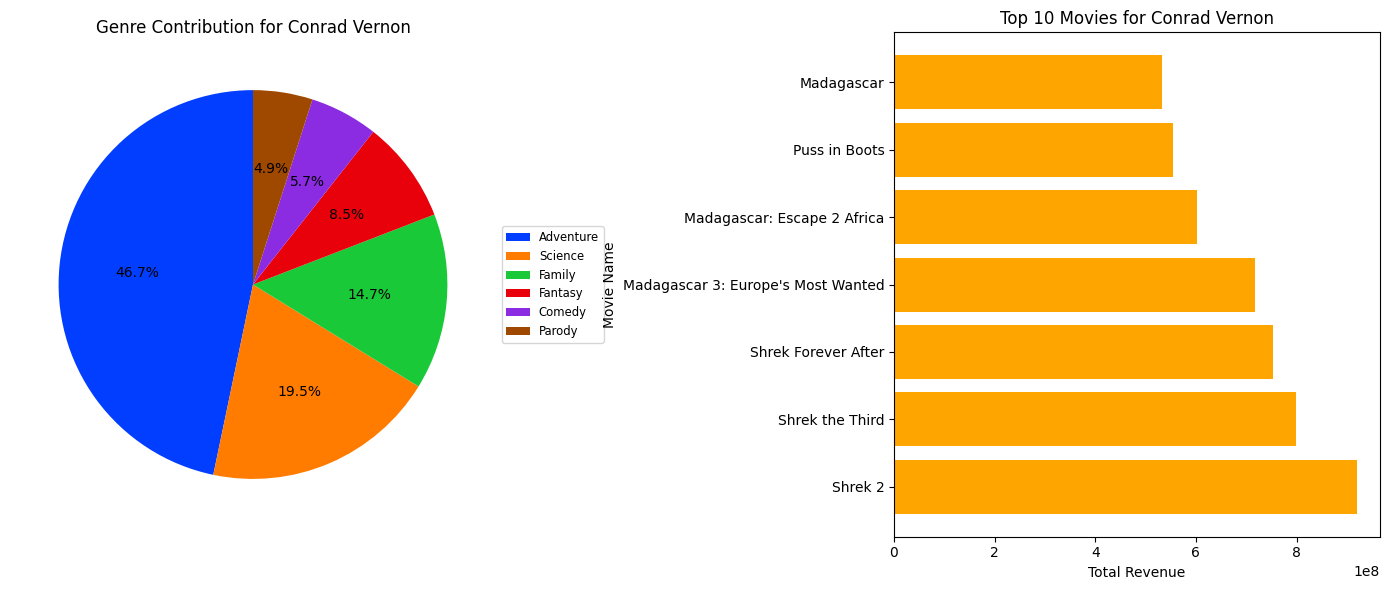

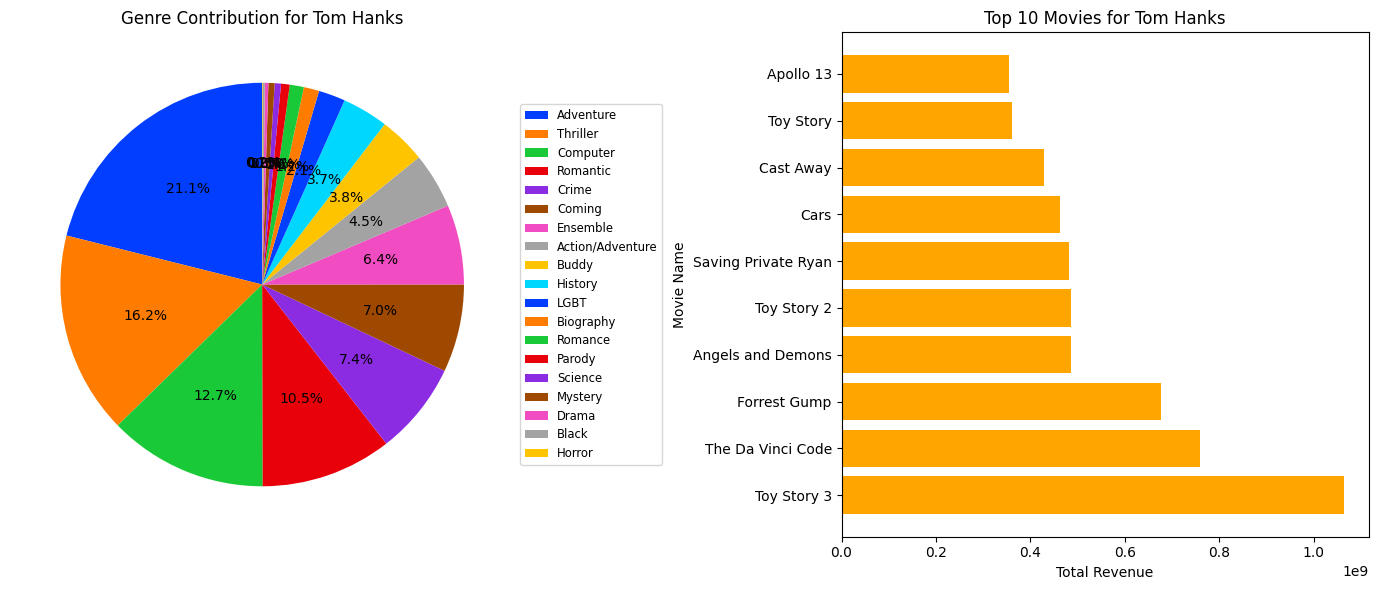

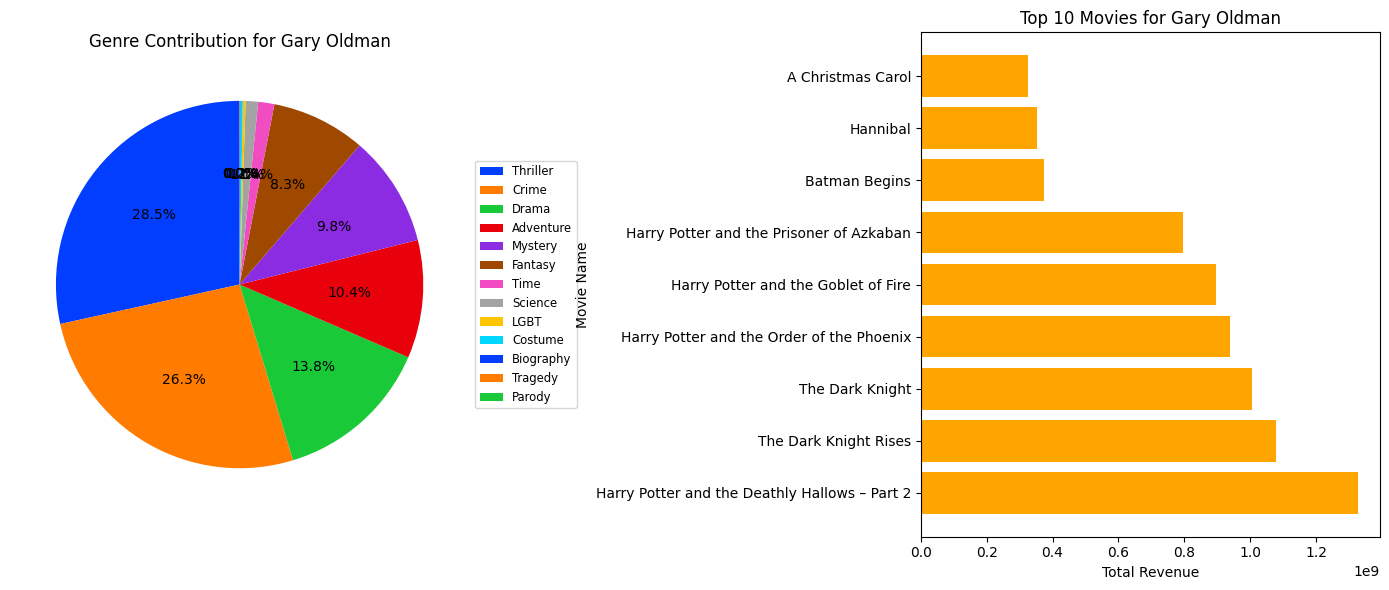

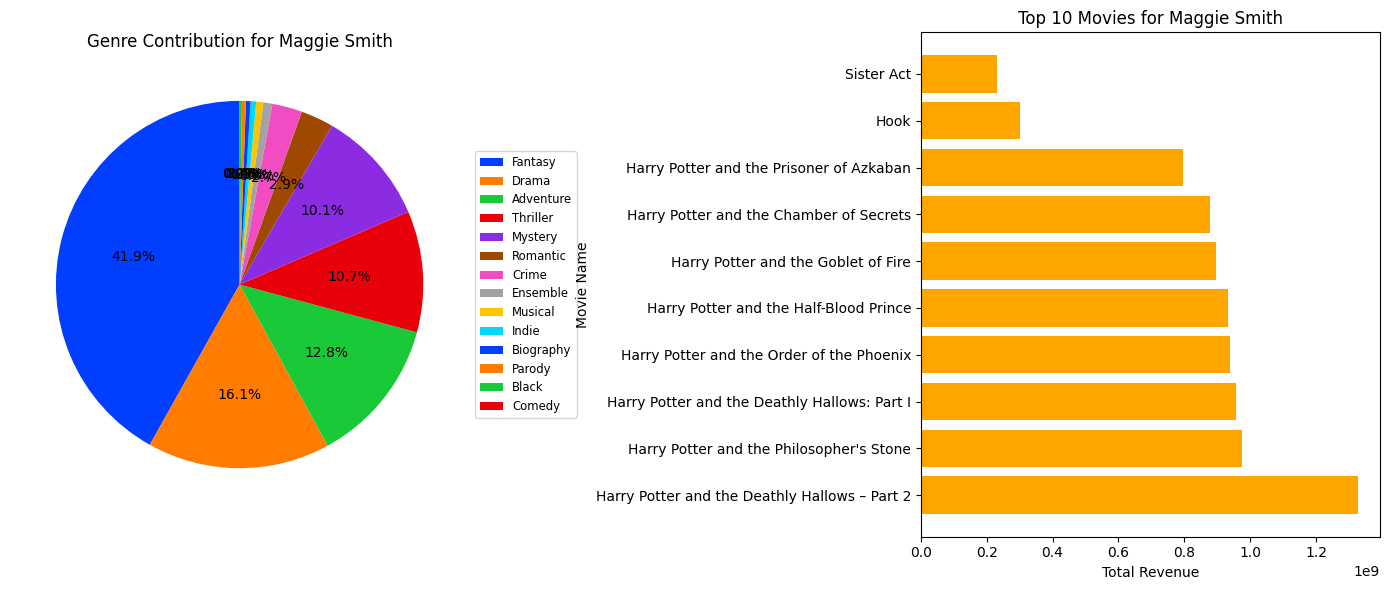

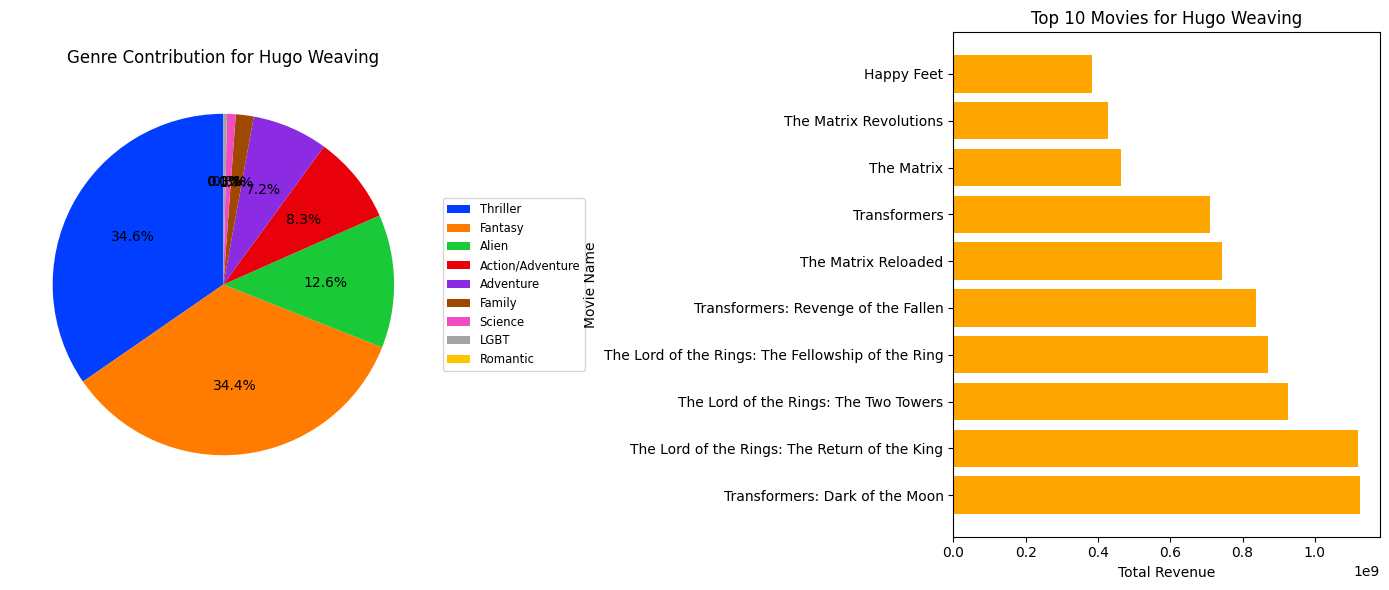

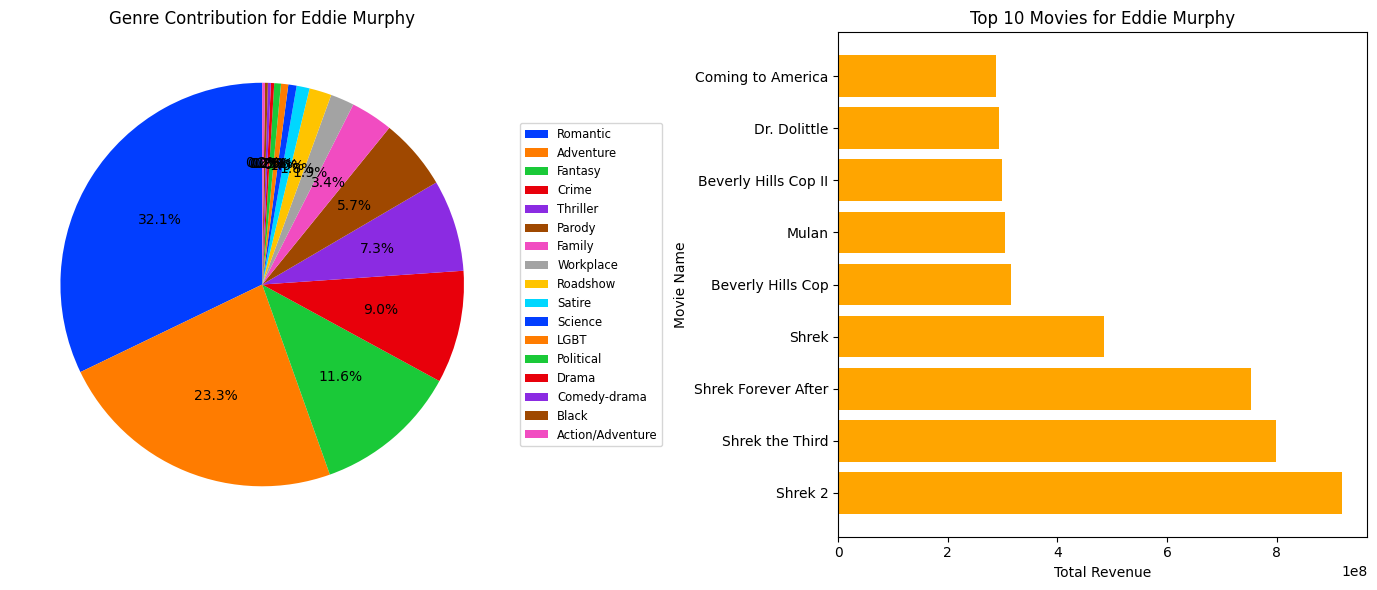

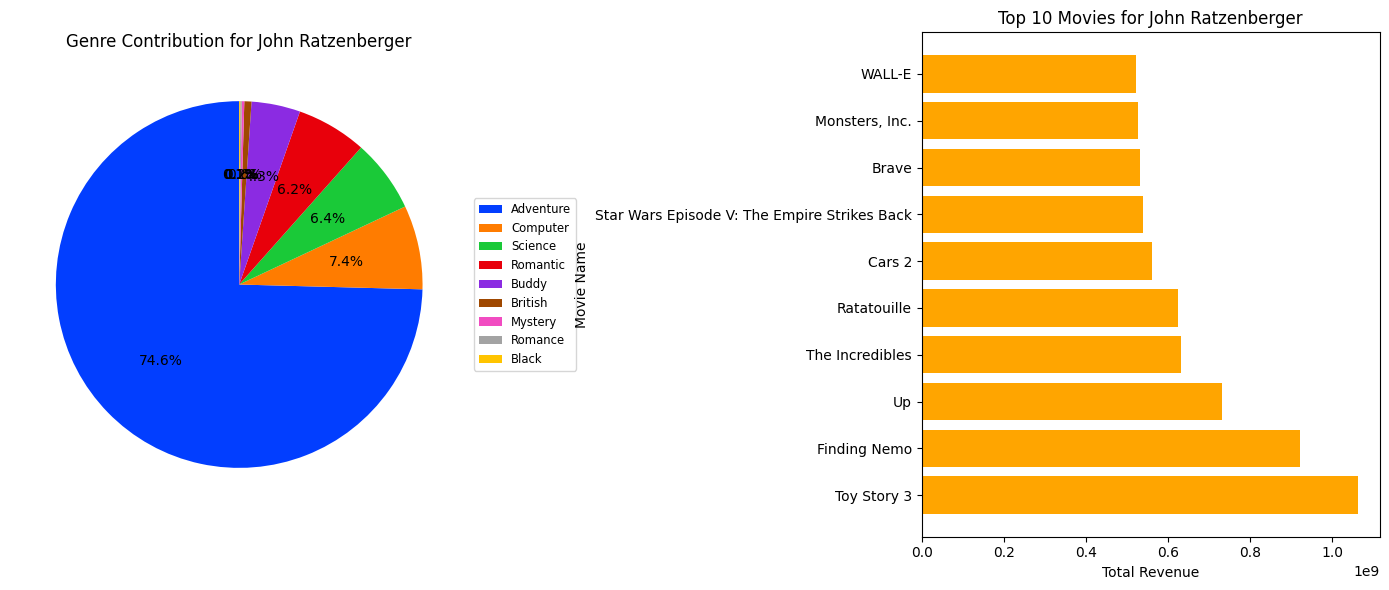

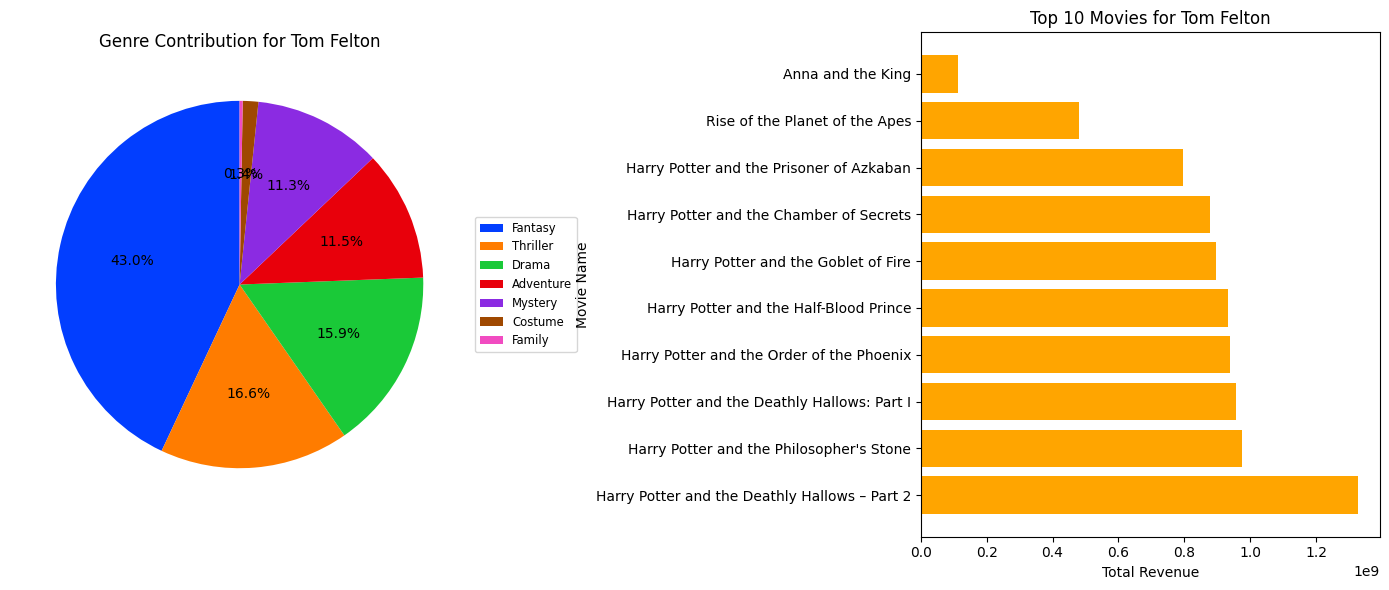

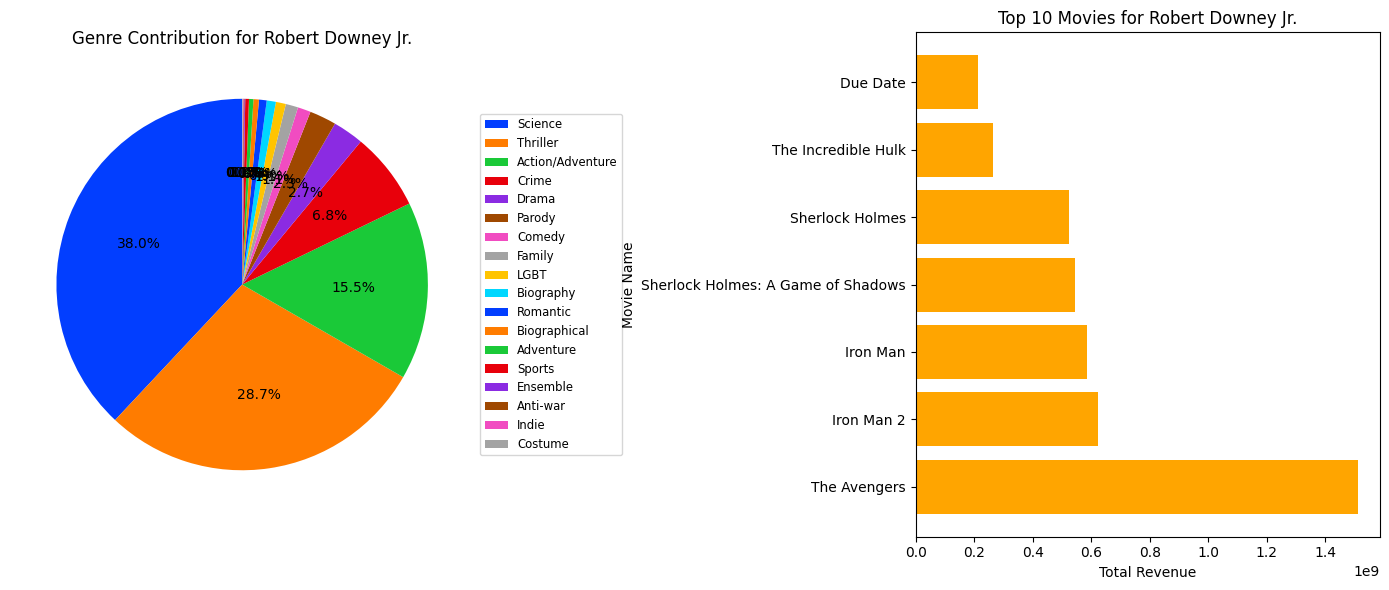

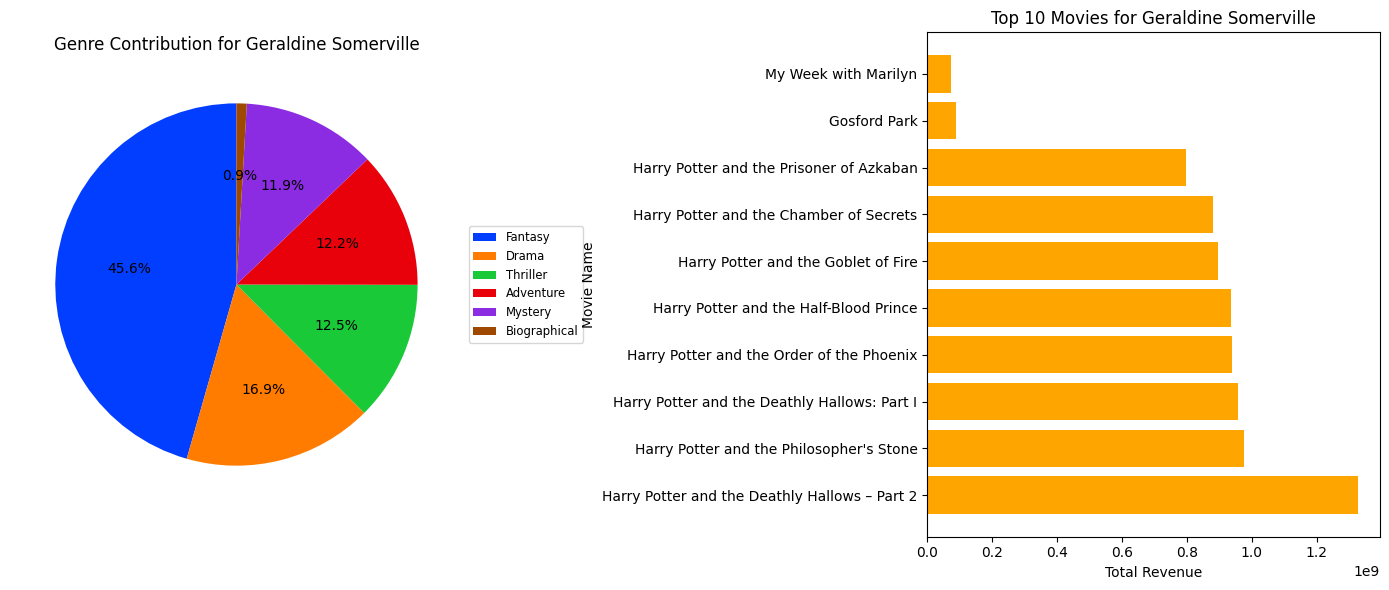

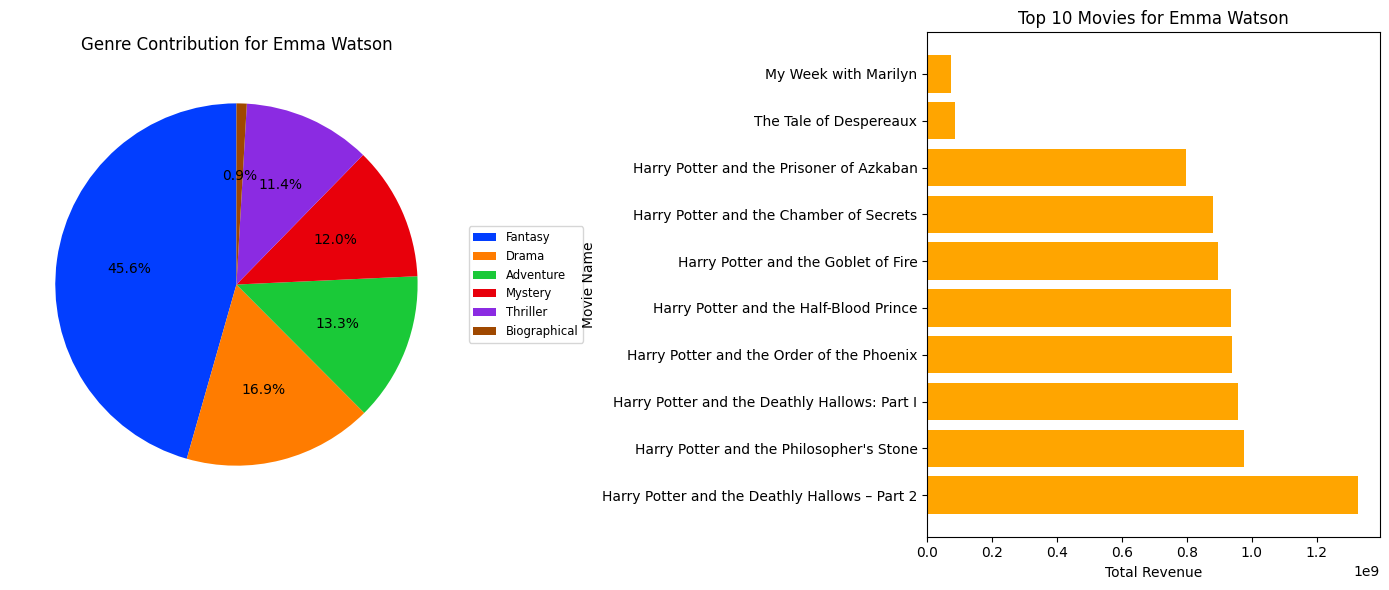

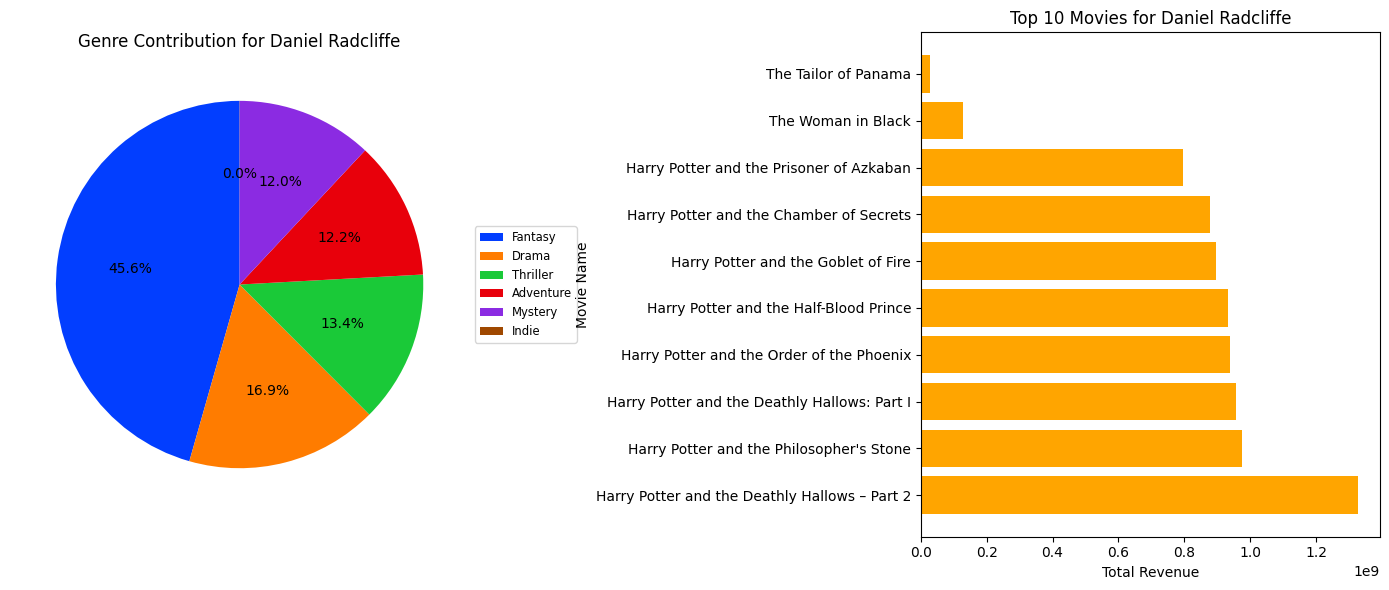

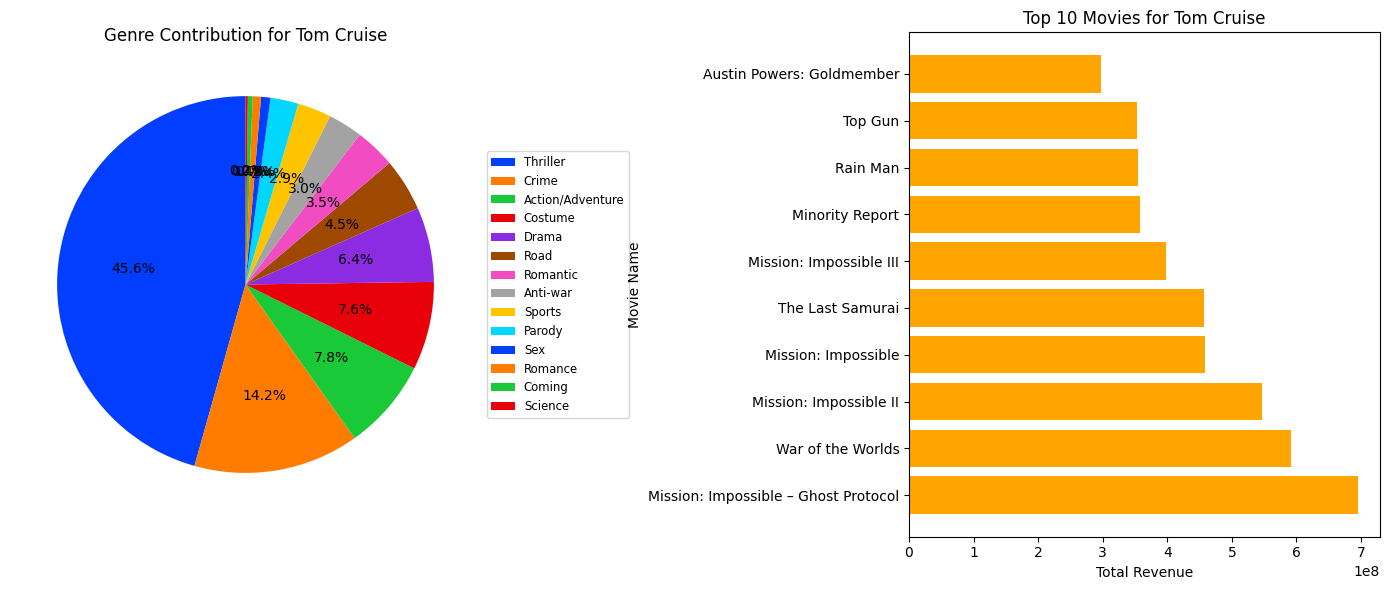

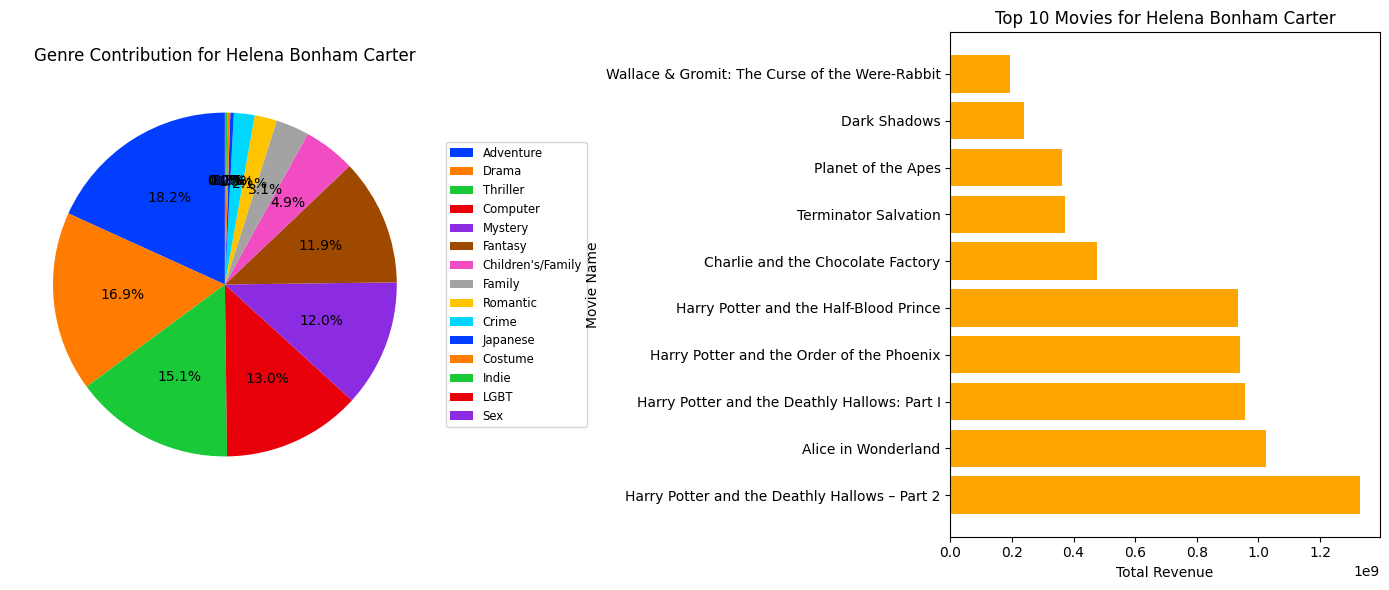

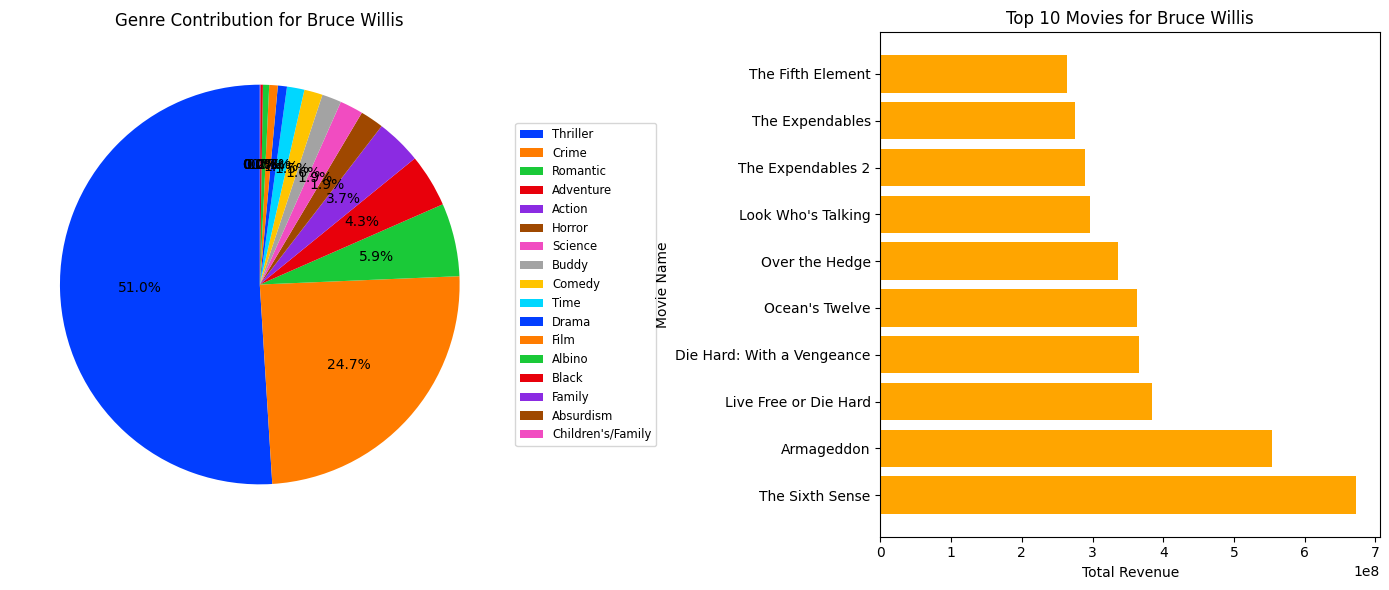

In [75]:
# Loop through each actor in the top 20
for i, actor in enumerate(actors):
    # Filter the merged data to include only the rows for the current actor
    actor_data = merged_data[merged_data['Actor name'] == actor]
    # Group the actor's data by movie genres and calculate total revenue for each genre
    genre_revenue = actor_data.groupby('Movie genres')['Movie box office revenue'].sum()
    # Sort genres by revenue and remove genres with 0% contribution
    genre_revenue = genre_revenue[genre_revenue > 0].sort_values(ascending=False)
    
    # Get the top 10 movies of the actor
    top_10_movies = actor_data.nlargest(10, 'Movie box office revenue')
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot pie chart for genre contribution
    # Calculate the total revenue
    total_revenue = genre_revenue.sum()

    # Calculate the percentage contribution of each genre
    percentages = genre_revenue / total_revenue * 100

    # Plot pie chart for genre contribution
    axs[0].pie(genre_revenue, labels=None, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
    axs[0].legend(genre_revenue.index, loc="center left", fontsize='small', bbox_to_anchor=(1, 0, 0.5, 1))
    axs[0].set_title(f"Genre Contribution for {actor}")
    
    # Plot top 10 movies with highest revenue
    axs[1].barh(top_10_movies['Movie name'], top_10_movies['Movie box office revenue'], color='orange')
    axs[1].set_title(f"Top 10 Movies for {actor}")
    axs[1].set_xlabel('Total Revenue')
    axs[1].set_ylabel('Movie Name')
    
    plt.tight_layout()
    plt.show()


# Quick Summary and Analysis of our question 2:

### Top Actors by Total Revenue:

        1. The actor with the highest total revenue across all movies is Warwick Davis with a total revenue of $12930162361.

        2. The top 20 actors by total revenue are visualized in a bar plot.

        3. Among the top 20 actors, Frank Welker has worked in the highest number of movies, which is 150.

        4. The analysis provides a tabular view of the top 20 actors, displaying their total revenue and the number of movies they have worked in.

### Genre Preferences and Revenue Patterns:

        1. For each of the top 20 actors, the genre that generated the maximum revenue is identified in the plot.

        2. The most profitable genre across all top 20 actors is Fantasy, with 35% of actors having this genre as their highest-grossing.

        3. A visualization shows the genres worked in by each top 20 actor, along with the genre that generated the maximum revenue for them.

        4. Pie charts and bar plots are provided for each top 20 actor, displaying:
                i. The contribution of different genres to their total revenue, expressed as percentages.
                ii. Their top 10 highest-grossing movies, ranked by box office revenue.

### Individual Actor Analysis:

        1. The analysis delves deeper into each of the top 20 actors, providing a comprehensive breakdown of their genre preferences and 
        revenue patterns.

        2. For each actor, the following information is presented:
                i. The maximum revenue generated by a single genre.
                ii. The specific genre that yielded the maximum revenue.
                iii. A pie chart visualizing the percentage contribution of    each genre to the actor's total revenue.
                iv. A bar plot showcasing the actor's top 10 highest-grossing movies, ranked by box office revenue.

### Conclusion:

        1. The analysis reveals the top actors in terms of total revenue generated from their movies, with Warwick Davis leading the pack with a total revenue of $12930162361 approx. $12.93 Billion.
        
        2. The genre Fantasy emerges as the most profitable for the majority (%) of top actors.

        3. The visualizations offer insights into the genre preferences and revenue patterns of these top actors, highlighting the genres that resonate well with audiences and contribute to higher box office success.
        
        4. This information can be valuable for movie studios, producers, and actors themselves in making informed decisions about future projects and collaborations, considering the genres that have proven to be financially successful.
        
        5. The analysis underscores the importance of genre selection and its impact on an actor's performance and success in the movie industry.
        
        6. The individual actor analysis provides a detailed breakdown of each top actor's genre preferences, revenue contributions, and highest-grossing movies, enabling a deeper understanding of their career trajectories and success factors.

## Question 3: 

#### How have movie production, box office performance, and genre preferences varied across different countries and regions over time, and what factors contribute to their success in specific markets? Also, analysing which character name appeared to be the most in all the movies.

In [85]:
# Load character metadata
character_metadata_file = r"C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\Data Mining\Mini-Project\MovieSummaries\character.metadata.tsv"
character_metadata = pd.read_csv(character_metadata_file, sep="\t", header=None)

# Define column names based on the provided description
column_names = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", 
                "Actor DOB", "Actor gender", "Actor height", "Actor ethnicity ID", 
                "Actor name", "Actor age at movie release", "Freebase character actor map ID", 
                "Freebase character ID", "Freebase actor ID"]

character_metadata.columns = column_names

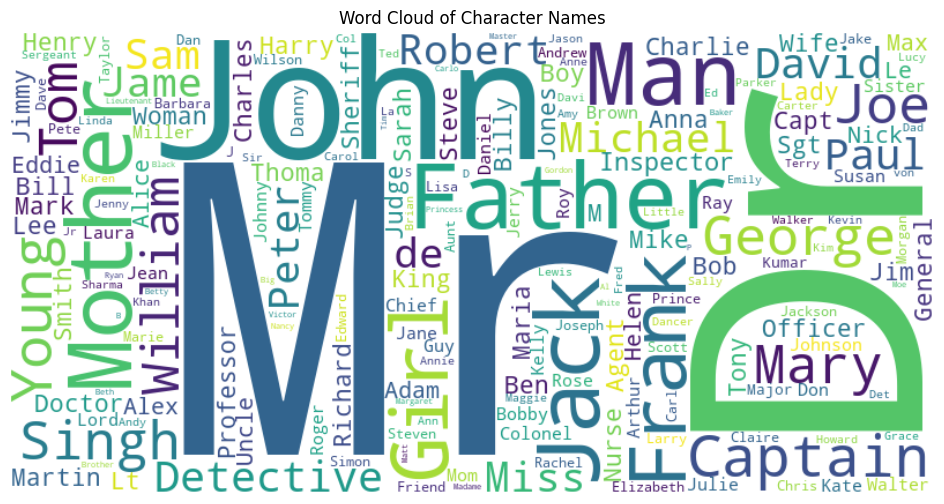

In [89]:
from wordcloud import WordCloud

# Visualization - Word Cloud
# Create a string containing all character names
all_character_names = ' '.join(merged_data['Character name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_character_names)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Character Names')
plt.axis('off')
plt.show()


In [90]:
# Define column names
column_names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']

# Load movie metadata with specified column names
movie_metadata = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\Data Mining\Mini-Project\MovieSummaries\movie.metadata.tsv", sep='\t', header=None, names=column_names)

In [96]:
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(lambda x: x.split('"')[3].split()[0] if len(x.split('"')) > 3 else x)
movie_metadata = movie_metadata[movie_metadata['Movie countries'] != "{}"]

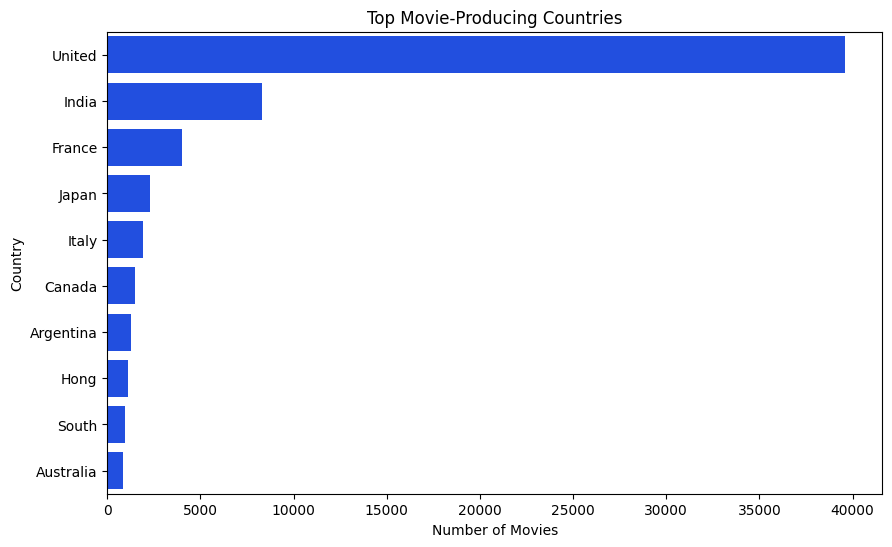

In [105]:
# 1. Country-wise Movie Production Trends
country_counts = movie_metadata["Movie countries"].str.split(",", expand=True).stack().value_counts()
top_countries = country_counts.head(10).index.tolist()

# Visualize top movie-producing countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts[top_countries].values, y=top_countries, palette="viridis")
for i, count in enumerate(country_counts[top_countries].values):
    plt.text(count, i, str(count), ha='left', va='center', fontsize=10)
plt.title("Top Movie-Producing Countries")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


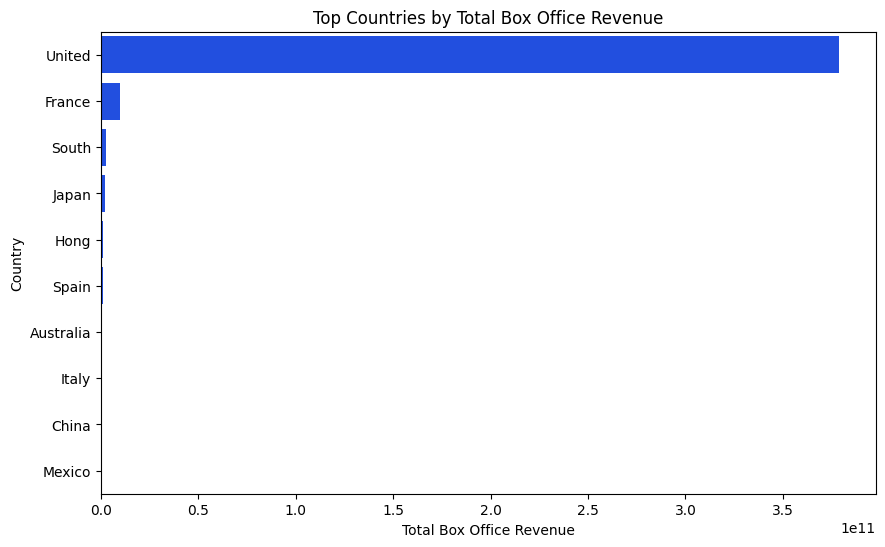

In [106]:
# 2. Box Office Performance by Country
country_revenue = movie_metadata.groupby("Movie countries")["Movie box office revenue"].sum().reset_index()
top_revenue_countries = country_revenue.nlargest(10, "Movie box office revenue")

# Visualize top countries by total box office revenue
plt.figure(figsize=(10, 6))
sns.barplot(x="Movie box office revenue", y="Movie countries", data=top_revenue_countries)
plt.title("Top Countries by Total Box Office Revenue")
plt.xlabel("Total Box Office Revenue")
plt.ylabel("Country")
plt.show()

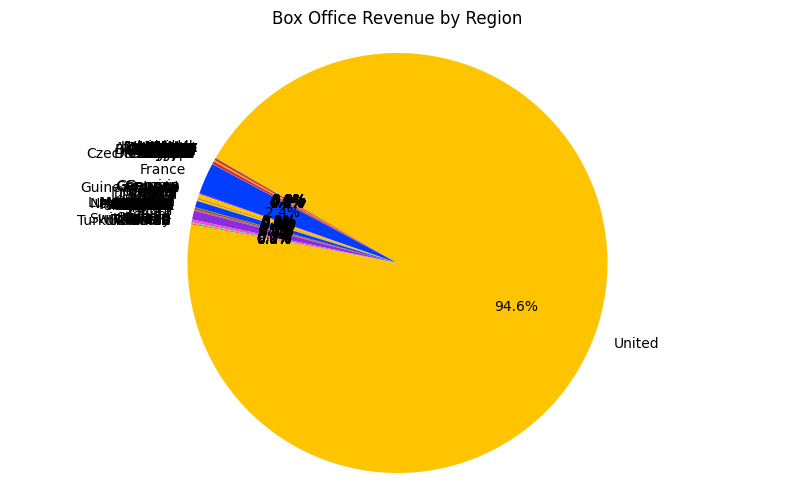

In [109]:
# 3. Regional Box Office Patterns
movie_metadata["Region"] = movie_metadata["Movie countries"].str.split(",").apply(lambda x: x[0].strip())
region_revenue = movie_metadata.groupby("Region")["Movie box office revenue"].sum().reset_index()

# Visualize box office revenue by region
plt.figure(figsize=(10, 6))
region_revenue["Percentage"] = region_revenue["Movie box office revenue"] / region_revenue["Movie box office revenue"].sum() * 100
plt.pie(region_revenue["Percentage"], labels=region_revenue["Region"], autopct='%.1f%%', startangle=150)
plt.title("Box Office Revenue by Region")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [115]:
# Convert "Movie release date" to datetime
movie_metadata["Movie release date"] = pd.to_datetime(movie_metadata["Movie release date"], errors='coerce')

# Extract the year from the release date
movie_metadata["Year"] = movie_metadata["Movie release date"].dt.year

# Group data by genre and year, summing the box office revenue
genre_revenue_year = movie_metadata.groupby(["Movie genres", "Year"])["Movie box office revenue"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Movie box office revenue", hue="Movie genres", data=genre_revenue_year, ci=None)
plt.fill_between(genre_revenue_year["Year"], genre_revenue_year["Movie box office revenue"], color="skyblue", alpha=0.3)
plt.title("Genre Revenue Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Box Office Revenue")
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_20152\3931044526.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="Movie box office revenue", hue="Movie genres", data=genre_revenue_year, ci=None)
C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# Quick Summary and Analysis of our question 3:

#### Top Movie-Producing Countries:

* The analysis reveals the top movie-producing countries, with USA leading the pack, having produced 17532 movies in the dataset. Other major contributors include France, Japan, South Korea.

#### Box Office Performance by Region:

* In terms of box office revenue, the USA dominates with 94.6% contribution, followed by France at 2.4%. This highlights the importance of regional preferences and market dynamics in driving box office success.

#### Genre Revenue Trends:

* The line plot showcasing genre revenue trends over time reveals fluctuations and shifts in audience preferences. Genres like Fantasy have consistently performed well, indicating their enduring popularity among moviegoers.

#### Regional Preferences and Opportunities:

* The analysis uncovers regional variations in genre preferences and box office performance, highlighting potential opportunities for movie studios and filmmakers to tailor their strategies and content for specific regions. Understanding these regional nuances can contribute to broader commercial success.